In [4]:
#import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston, load_iris
%matplotlib inline

In [5]:
dataframe = pd.read_csv('PEP1.csv')

## 1.Understanding the datset.
* with the help of info() we understand the dataset,i.e the column name, total null values and the data-type.

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
dataframe.shape

(1460, 81)

In [10]:
dataframe = dataframe.sort_values(by=['Id'])
dataframe

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [11]:
numerical_feature_columns = list(dataframe._get_numeric_data().columns)
numerical_feature_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'Bedroom',
 'Kitchen',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [12]:
categorical_feature_columns = list(set(dataframe.columns) - set(dataframe._get_numeric_data().columns))
categorical_feature_columns

['Condition1',
 'BsmtCond',
 'CentralAir',
 'RoofMatl',
 'BldgType',
 'LotShape',
 'HeatingQC',
 'Condition2',
 'KitchenQual',
 'FireplaceQu',
 'BsmtFinType1',
 'MasVnrType',
 'Heating',
 'Exterior2nd',
 'ExterCond',
 'Functional',
 'SaleCondition',
 'RoofStyle',
 'GarageQual',
 'PoolQC',
 'BsmtExposure',
 'GarageCond',
 'LotConfig',
 'Street',
 'GarageType',
 'LandSlope',
 'LandContour',
 'Foundation',
 'ExterQual',
 'Alley',
 'GarageFinish',
 'HouseStyle',
 'Fence',
 'PavedDrive',
 'Electrical',
 'BsmtFinType2',
 'MSZoning',
 'Utilities',
 'Neighborhood',
 'Exterior1st',
 'SaleType',
 'BsmtQual',
 'MiscFeature']

## Identify variables having missing values

Missing Numerical Features

In [13]:
for name in numerical_feature_columns:
  if dataframe[name].isna().sum() > 0:
    print(f" {name} : {dataframe[name].isna().sum()} ")

 LotFrontage : 259 
 MasVnrArea : 8 
 GarageYrBlt : 81 


In [14]:
for name in numerical_feature_columns:
  if dataframe[name].isna().sum() > 0: 
   print(f" {name} : {round(dataframe[name].isna().mean()*100)} ") 
  

 LotFrontage : 18 
 MasVnrArea : 1 
 GarageYrBlt : 6 


* If the Missing value Percentage is less than 30%.It can be neglected. So,here the missing value percentage is less than 30%.

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)

for name in numerical_feature_columns:
  if dataframe[name].isna().sum() > 0: 
    dataframe[name] = imputer.fit_transform(dataframe[[name]])

Missing Categorical Variables

In [16]:
for name in categorical_feature_columns:
  if dataframe[name].isna().sum() > 0:
    print(f" {name} : {dataframe[name].isna().sum()} ")

 BsmtCond : 37 
 FireplaceQu : 690 
 BsmtFinType1 : 37 
 MasVnrType : 8 
 GarageQual : 81 
 PoolQC : 1453 
 BsmtExposure : 38 
 GarageCond : 81 
 GarageType : 81 
 Alley : 1369 
 GarageFinish : 81 
 Fence : 1179 
 Electrical : 1 
 BsmtFinType2 : 38 
 BsmtQual : 37 
 MiscFeature : 1406 


* Replace missing value with new category

In [17]:
for name in categorical_feature_columns:
  if dataframe[name].isna().sum() > 0:
    dataframe[name] = dataframe[name].fillna("Missing")
 

* Checking if there is a missing value left

In [18]:
for name in list(set(dataframe.columns)):
  print(f" {name} : {round(dataframe[name].isna().mean()*100)} ") 

 BsmtCond : 0 
 BldgType : 0 
 BsmtFullBath : 0 
 BsmtHalfBath : 0 
 BsmtFinType1 : 0 
 MasVnrType : 0 
 GarageQual : 0 
 OverallQual : 0 
 3SsnPorch : 0 
 MoSold : 0 
 Foundation : 0 
 MSSubClass : 0 
 HouseStyle : 0 
 BsmtFinType2 : 0 
 MSZoning : 0 
 Utilities : 0 
 GarageCars : 0 
 MasVnrArea : 0 
 LowQualFinSF : 0 
 LotShape : 0 
 HeatingQC : 0 
 1stFlrSF : 0 
 WoodDeckSF : 0 
 Exterior2nd : 0 
 YearBuilt : 0 
 ExterCond : 0 
 LotArea : 0 
 Id : 0 
 Street : 0 
 OverallCond : 0 
 2ndFlrSF : 0 
 GarageFinish : 0 
 PoolArea : 0 
 FullBath : 0 
 Bedroom : 0 
 MiscVal : 0 
 MiscFeature : 0 
 CentralAir : 0 
 RoofMatl : 0 
 Condition2 : 0 
 KitchenQual : 0 
 HalfBath : 0 
 GrLivArea : 0 
 TotRmsAbvGrd : 0 
 YrSold : 0 
 BsmtExposure : 0 
 GarageArea : 0 
 LotConfig : 0 
 BsmtFinSF1 : 0 
 EnclosedPorch : 0 
 LandSlope : 0 
 Kitchen : 0 
 ExterQual : 0 
 Fence : 0 
 PavedDrive : 0 
 OpenPorchSF : 0 
 Neighborhood : 0 
 Exterior1st : 0 
 Condition1 : 0 
 TotalBsmtSF : 0 
 YearRemodAdd : 0

* Determination of unique values using Unique()

In [19]:
    
def df_unique(df):
    for i in df.columns:
        print('Column : ',i,'\n',df[i].unique(), '\n Total unique values is: ', df[i].nunique())
        print('----------------------------------------------------------------------')
df_unique(dataframe)


Column :  Id 
 [   1    2    3 ... 1458 1459 1460] 
 Total unique values is:  1460
----------------------------------------------------------------------
Column :  MSSubClass 
 [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] 
 Total unique values is:  15
----------------------------------------------------------------------
Column :  MSZoning 
 ['RL' 'RM' 'C (all)' 'FV' 'RH'] 
 Total unique values is:  5
----------------------------------------------------------------------
Column :  LotFrontage 
 [ 65.          80.          68.          60.          84.
  85.          75.          70.04995837  51.          50.
  70.          91.          72.          66.         101.
  57.          44.         110.          98.          47.
 108.         112.          74.         115.          61.
  48.          33.          52.         100.          24.
  89.          63.          76.          81.          95.
  69.          21.          32.          78.         121.
 122.          40. 

In [21]:
#stastical summary of the dataset
dataframe.describe()


Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    22.024023    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    70.049958    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   180.569112   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   164.250000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## 3.EDA OF NUMERICAL VARIABLES

In [22]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


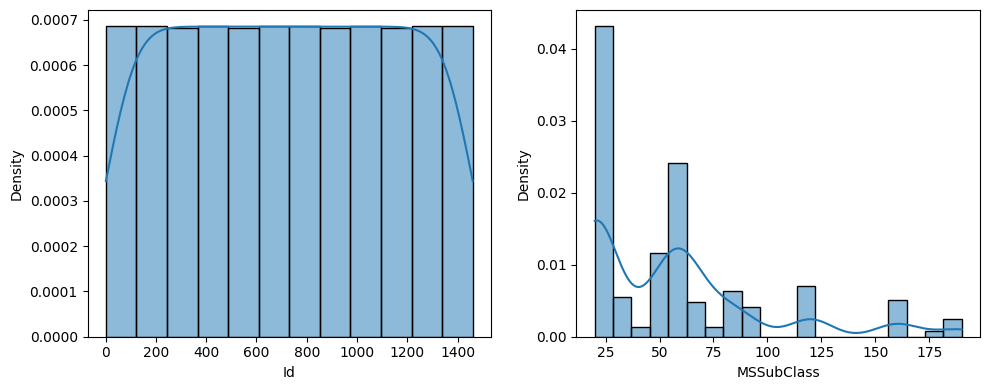

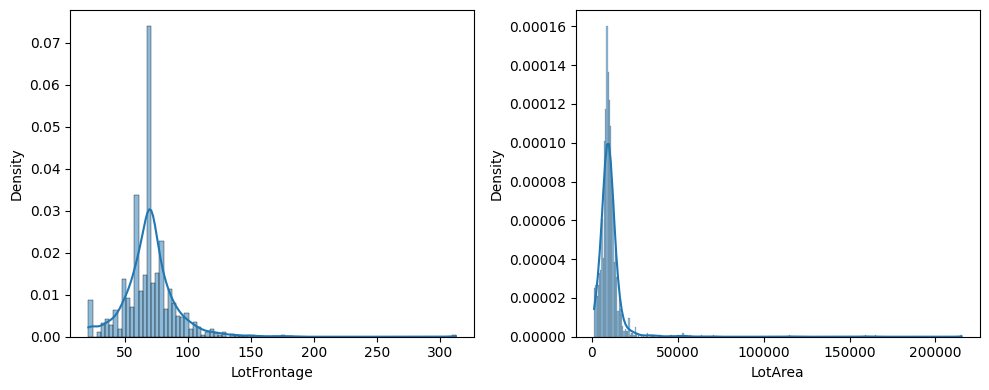

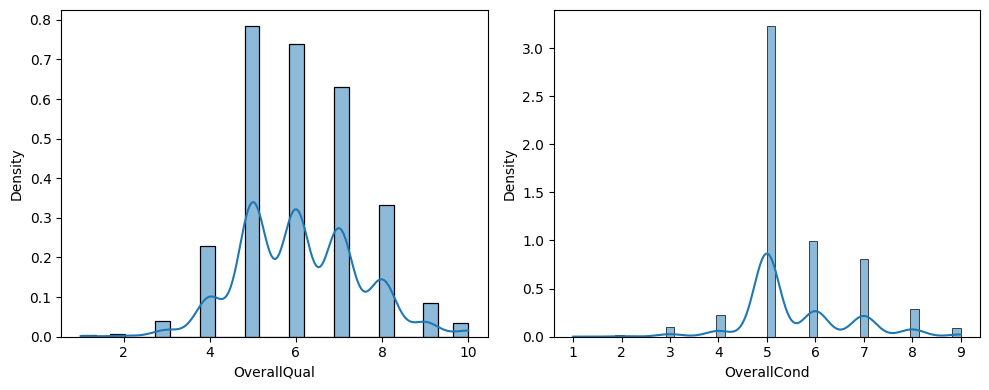

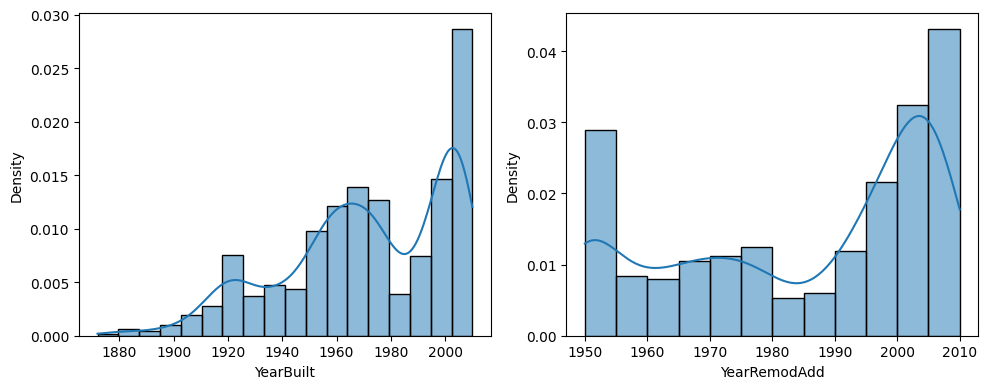

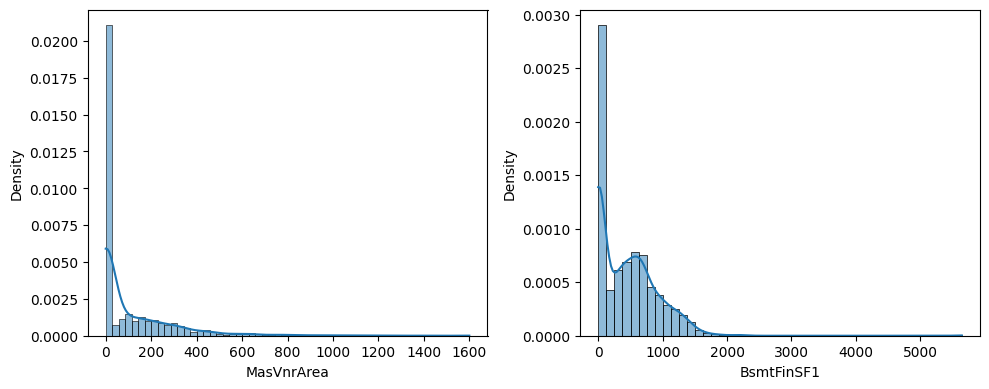

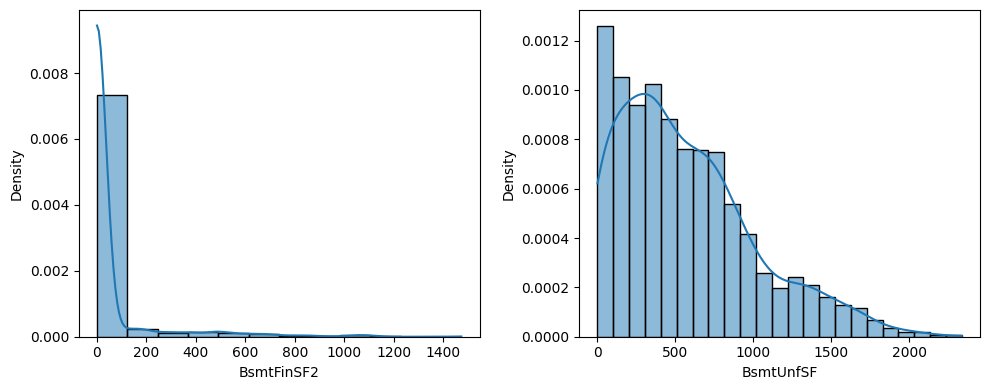

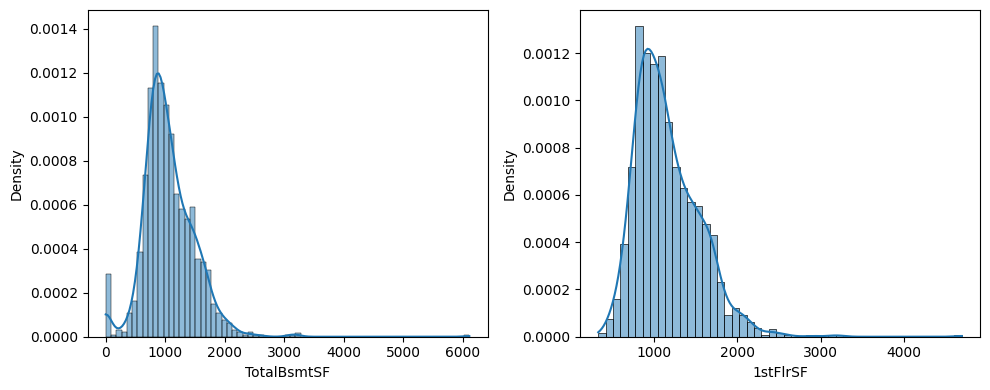

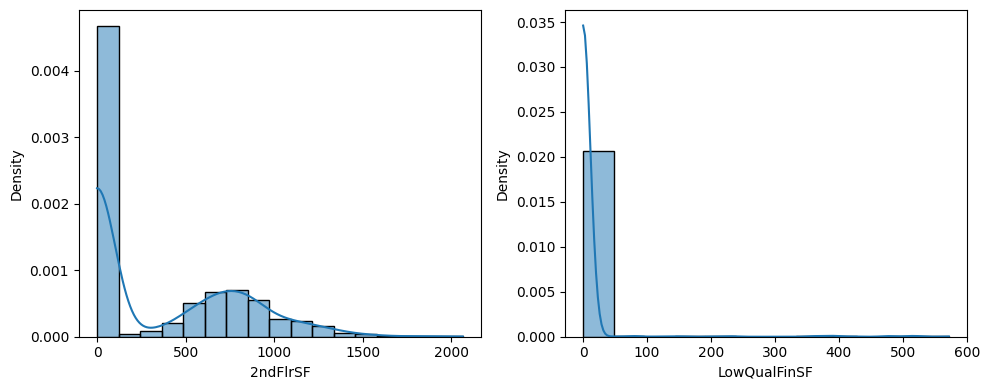

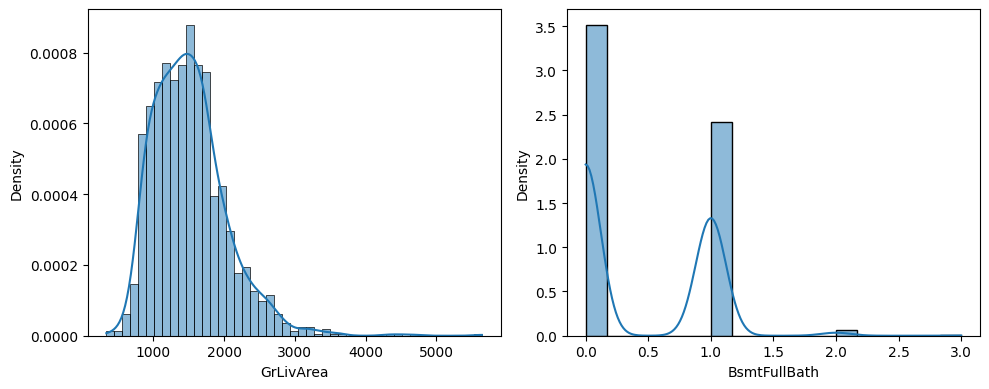

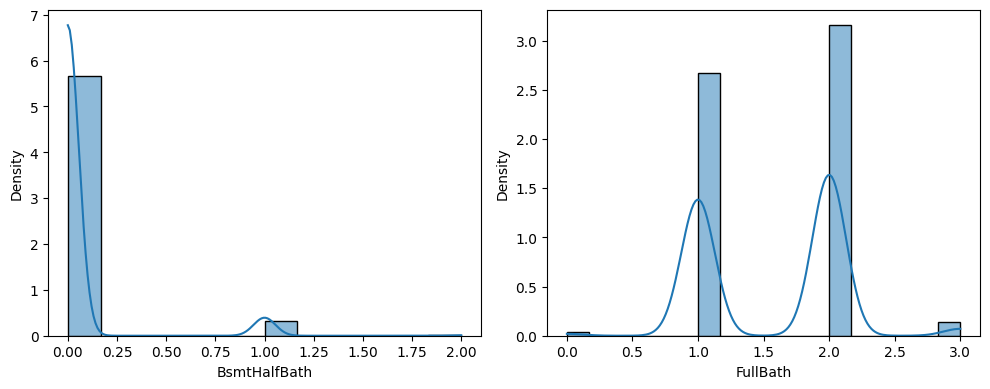

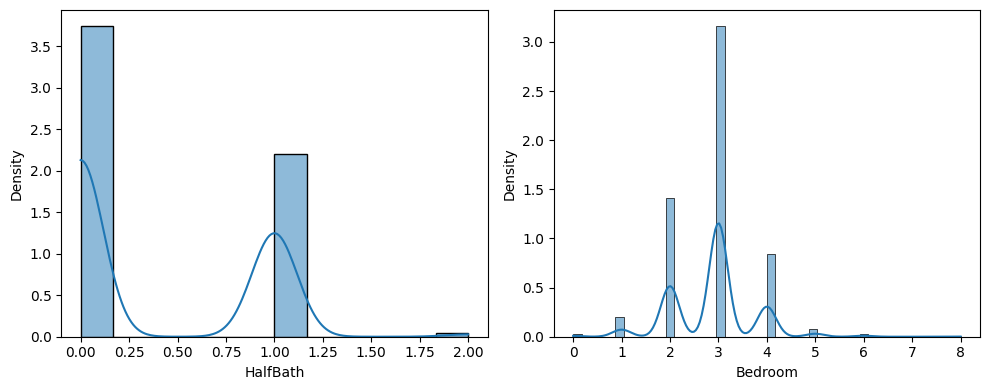

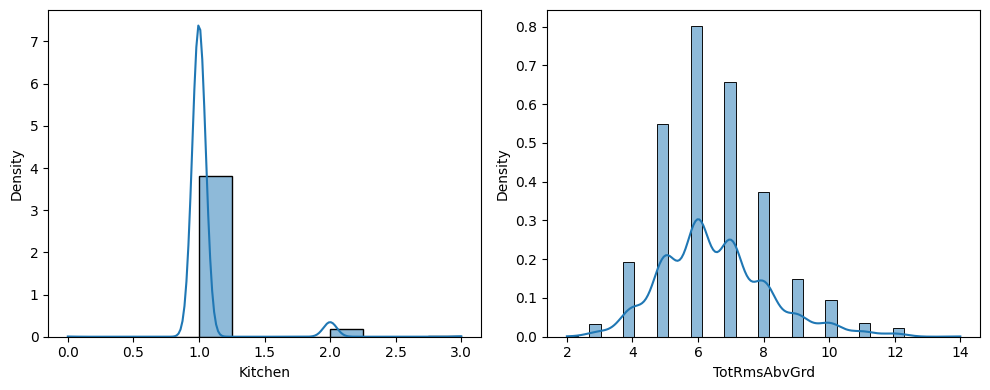

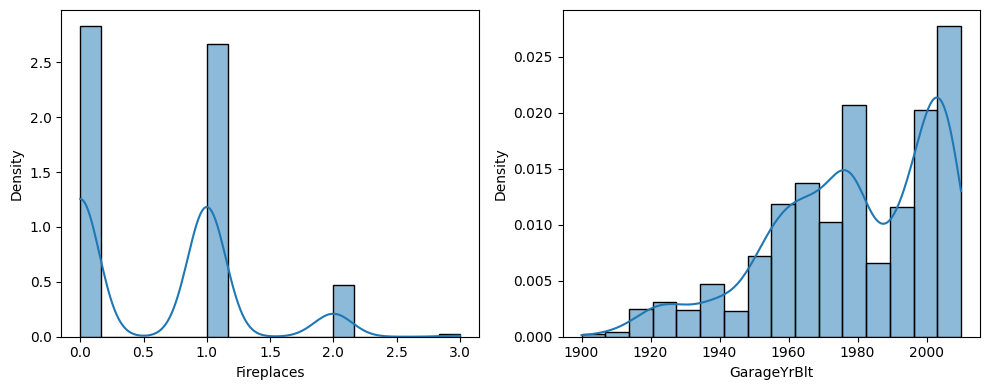

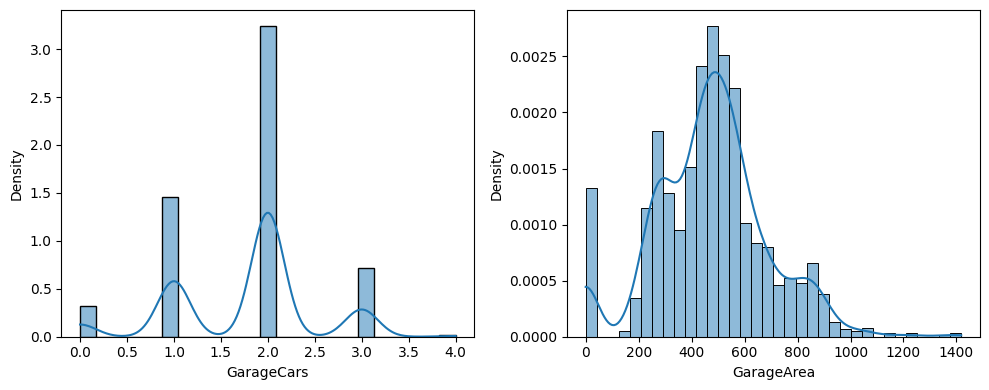

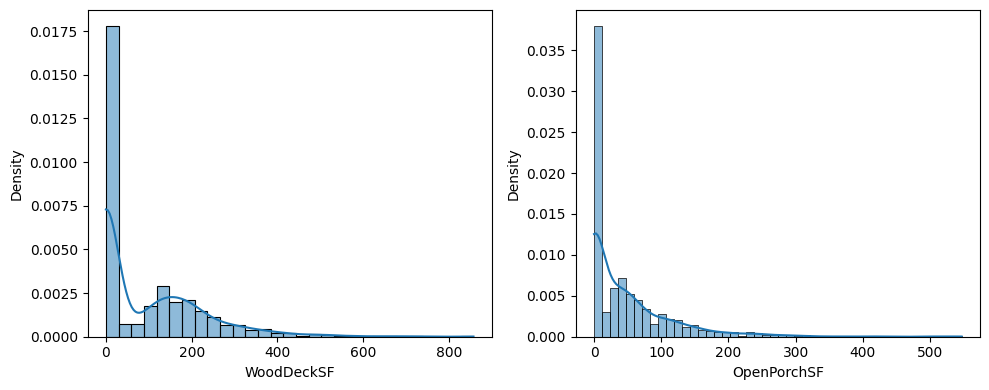

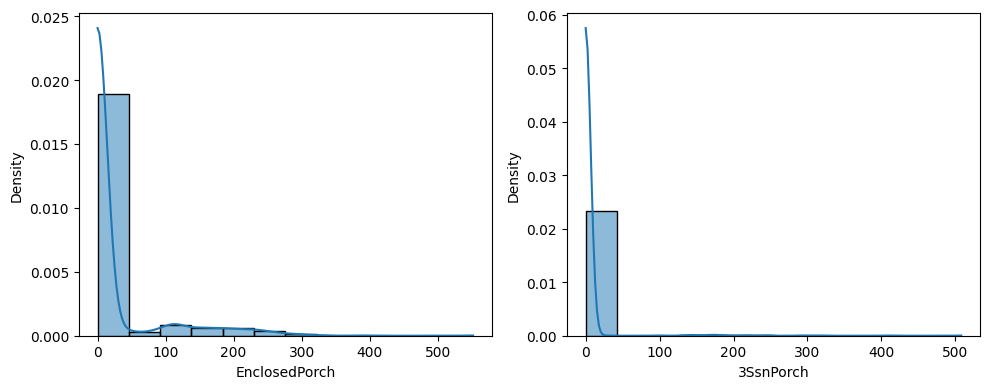

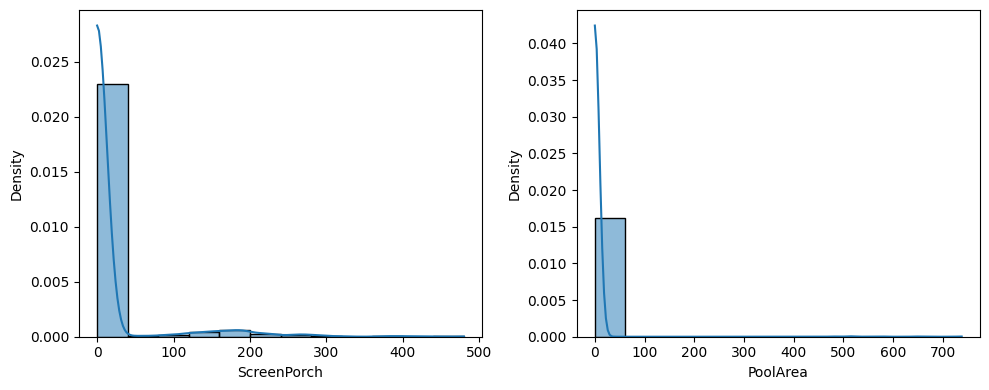

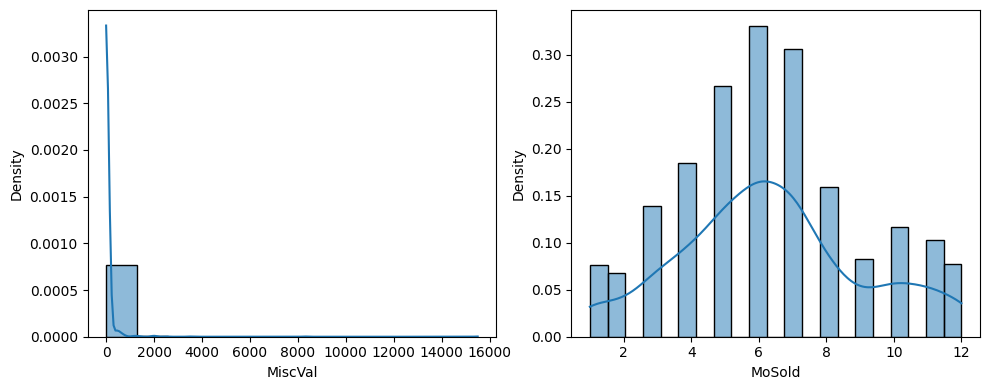

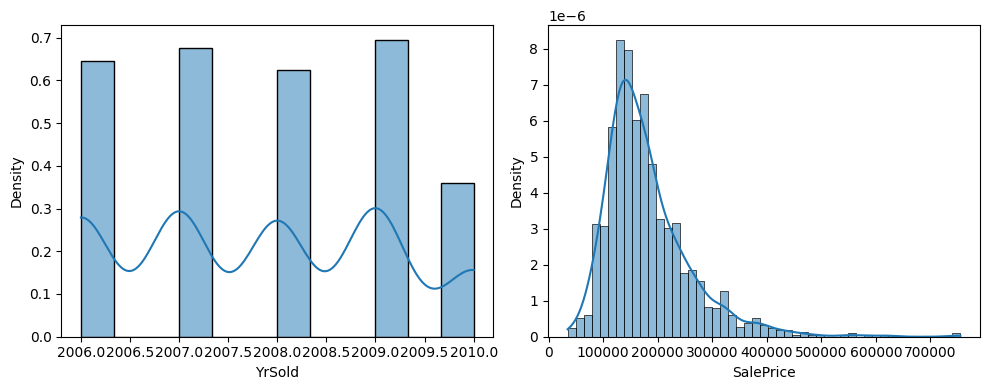

In [30]:
for i in range(0,len(numerical_feature_columns),2):
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.histplot(dataframe[numerical_feature_columns[i]],kde=True,stat="density")
        plt.subplot(122)            
        sns.histplot(dataframe[numerical_feature_columns[i+1]],kde=True,stat="density")
        plt.tight_layout()
        plt.show()

* Correlation is a statistical term that refers to how close two variables are to form a linear relationship with one another.

- High correlation features are more linearly dependent and therefore have almost the same effect on the dependent variable. When two features have a high correlation, we can drop one of them.
* we can identify significant variables using correlation matrix with the help of heatmap.

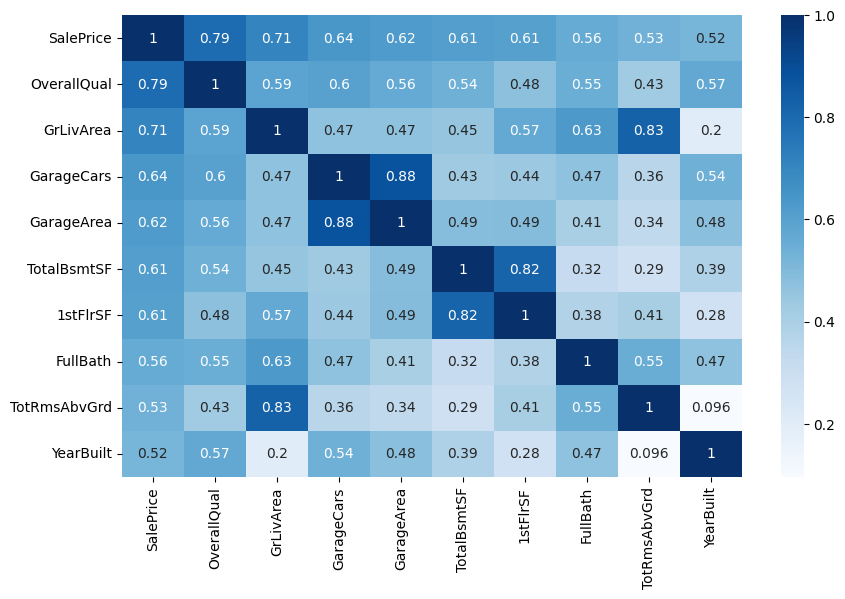

In [35]:
k = 10 #number of variables for heatmap
cols = dataframe.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = dataframe[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True,cmap = 'Blues')
plt.show()

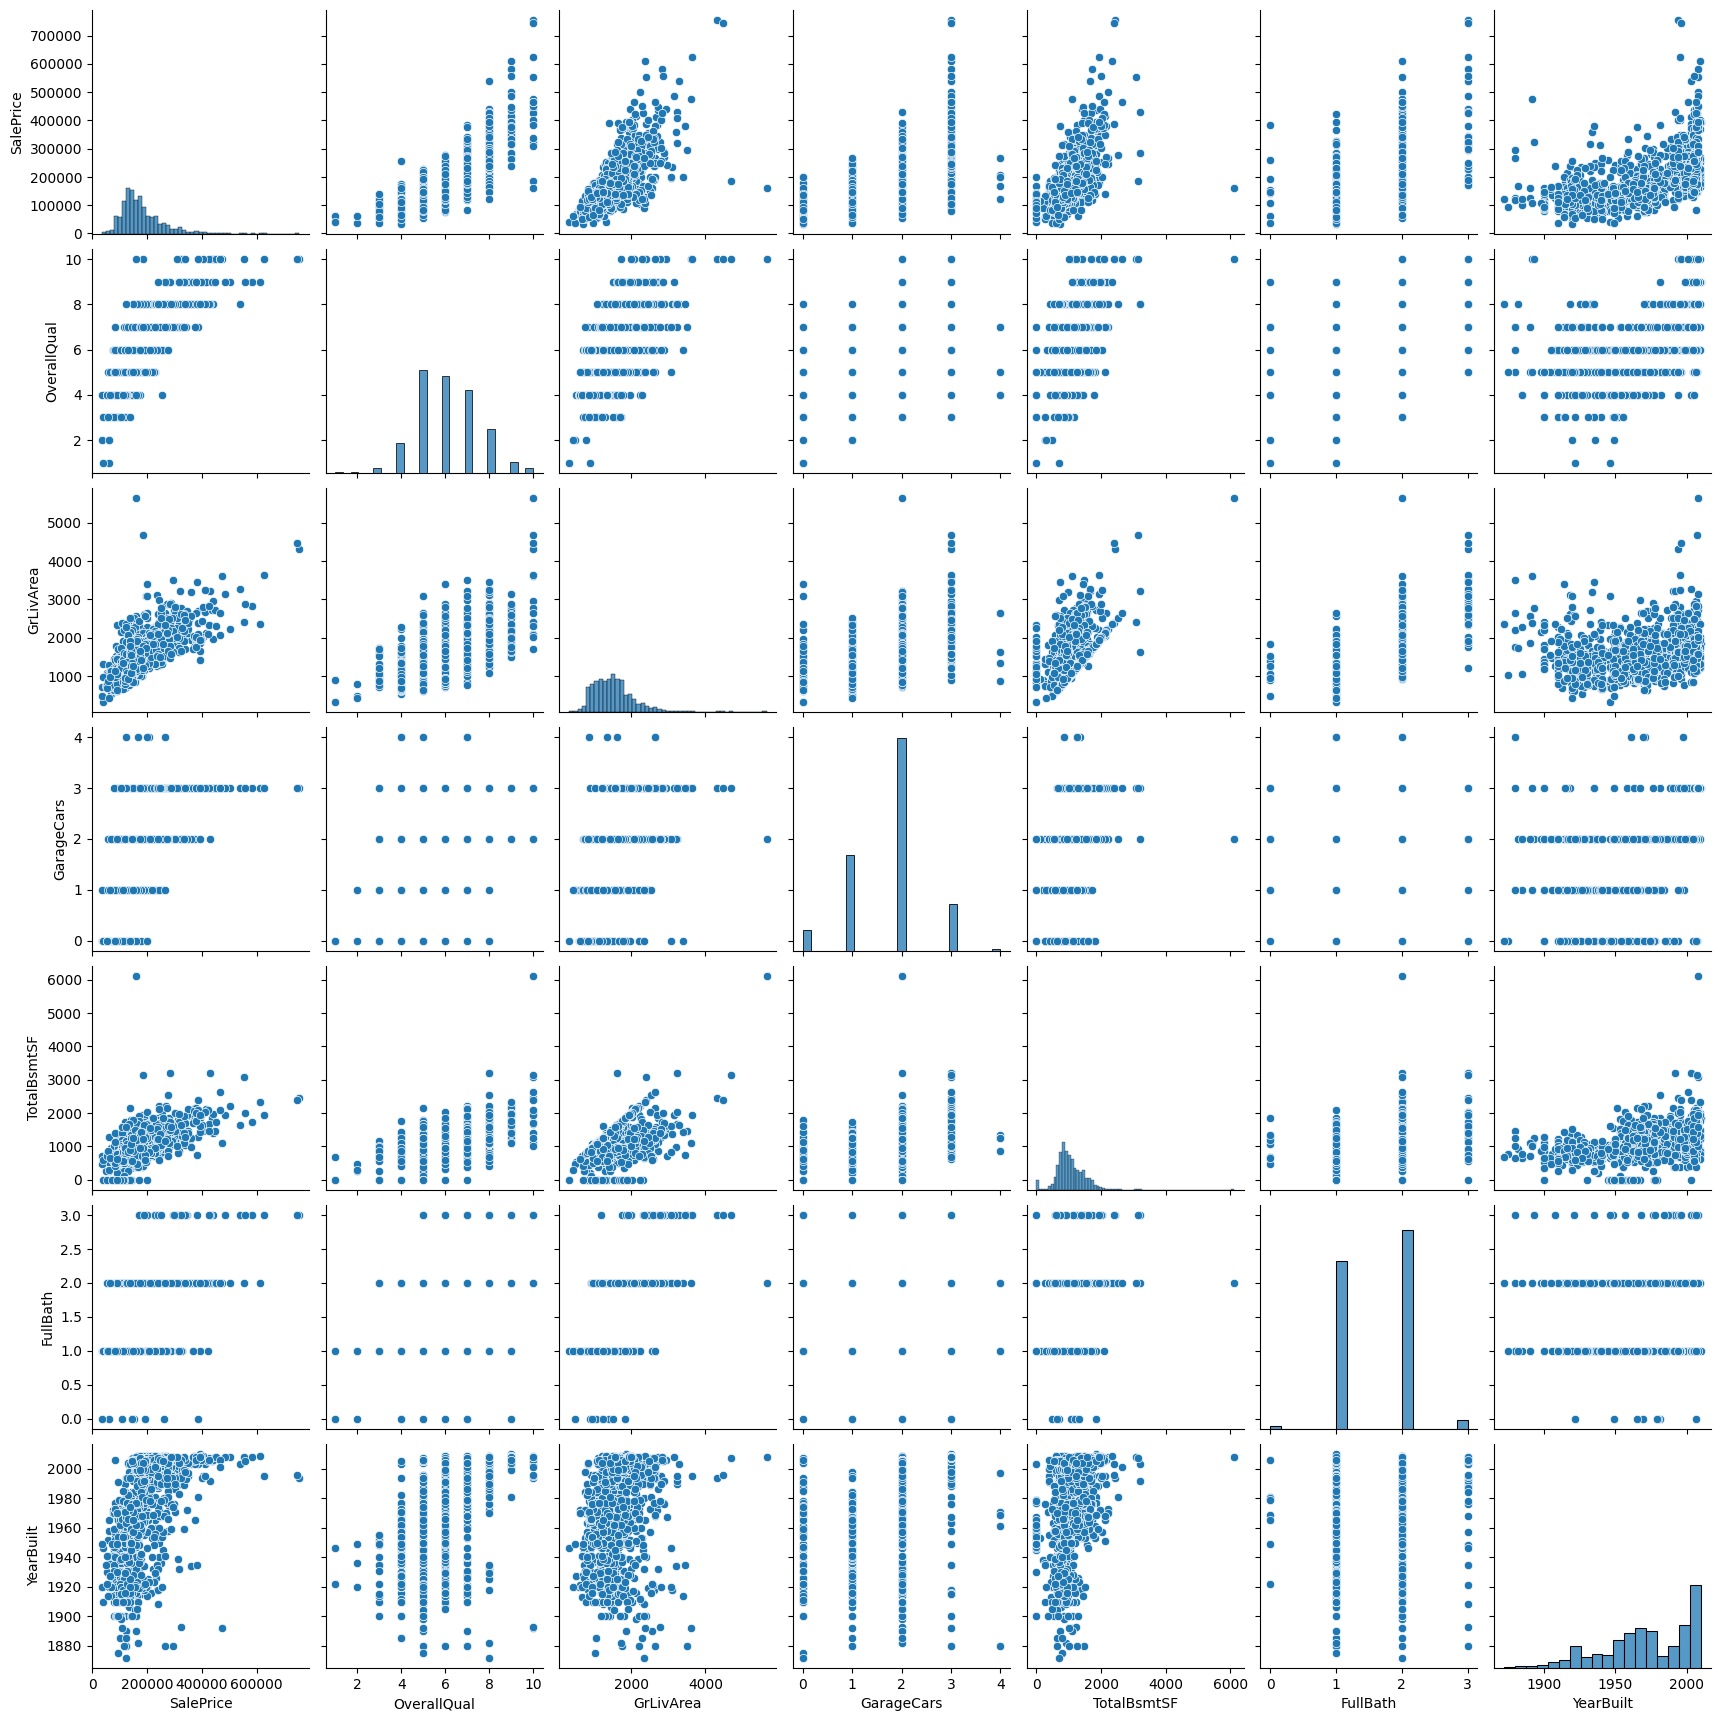

In [36]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(dataframe[cols])
plt.show()

# 4.EDA of categorical variables

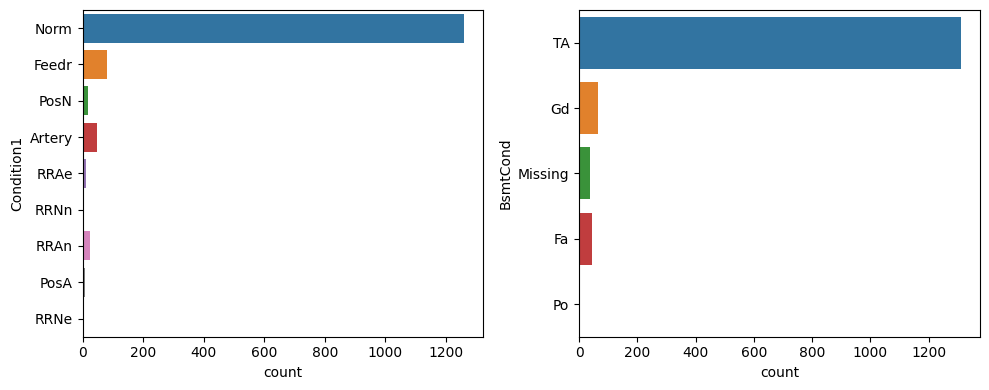

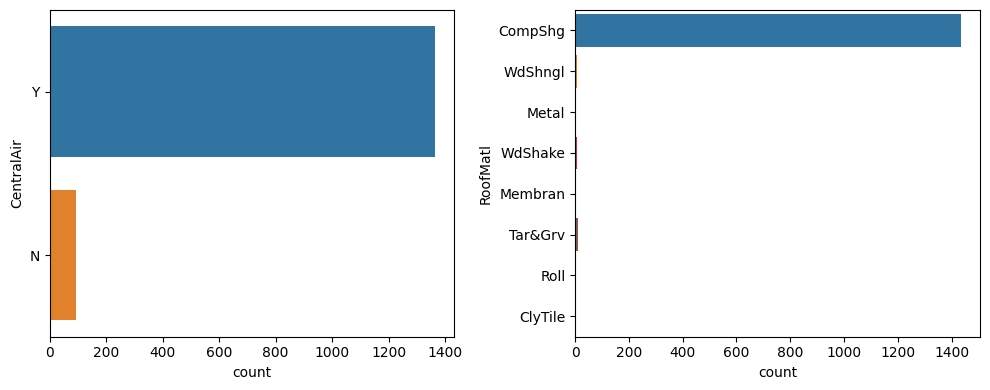

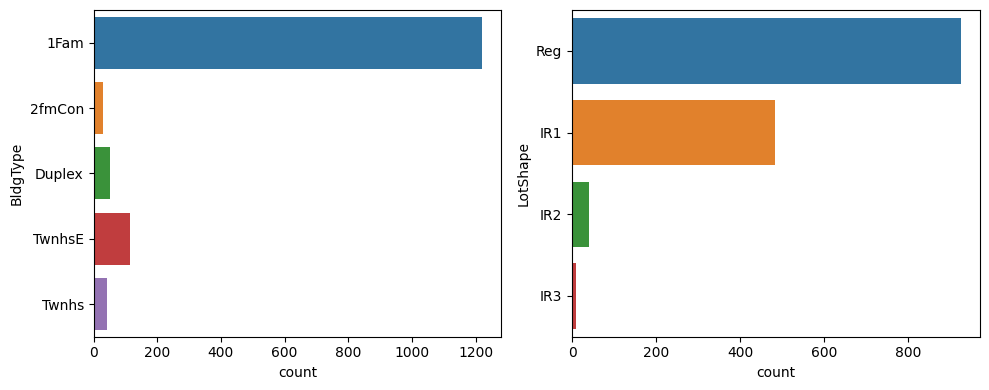

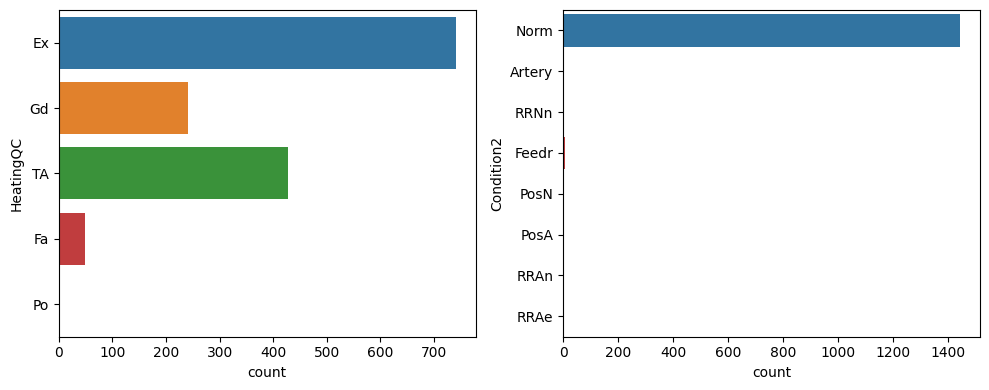

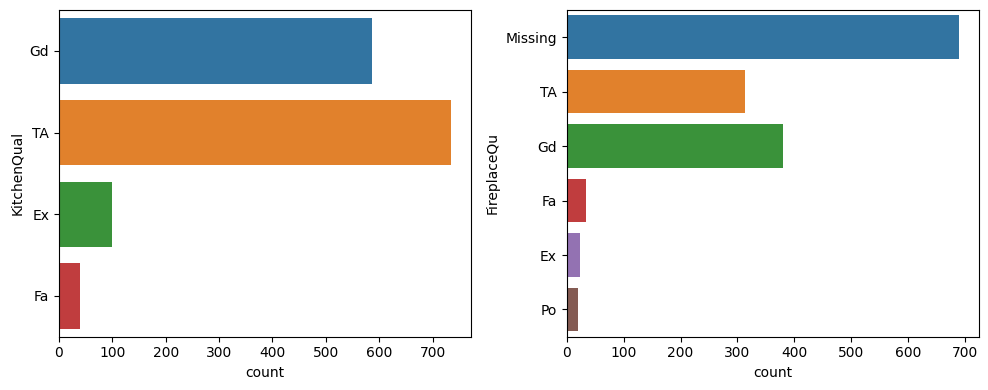

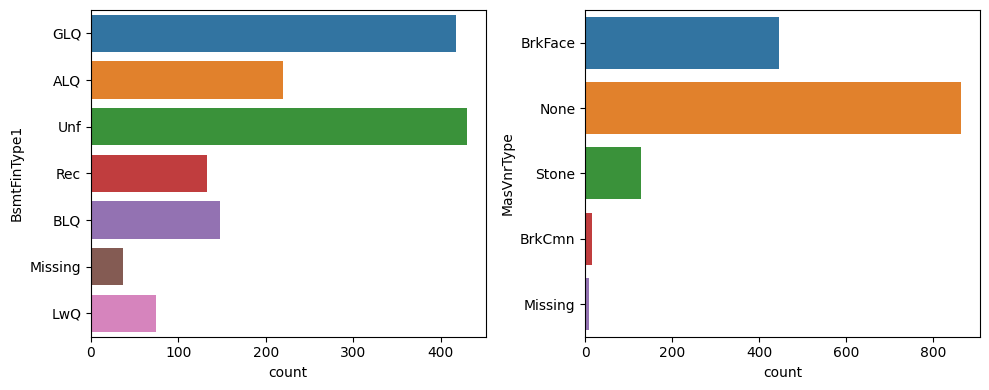

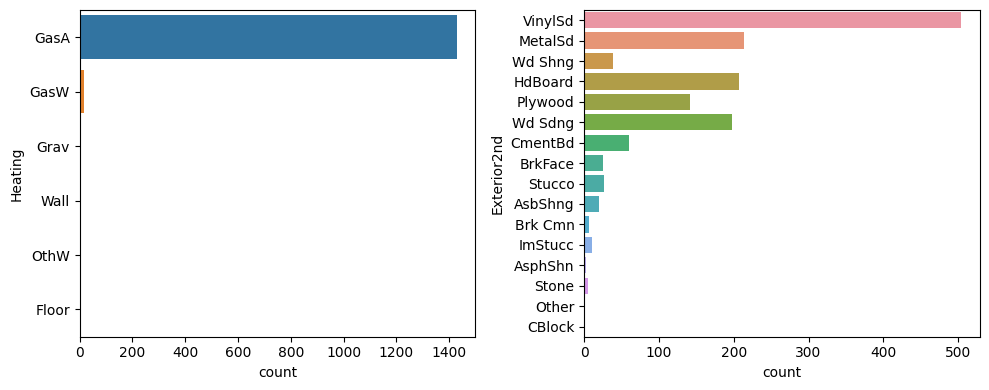

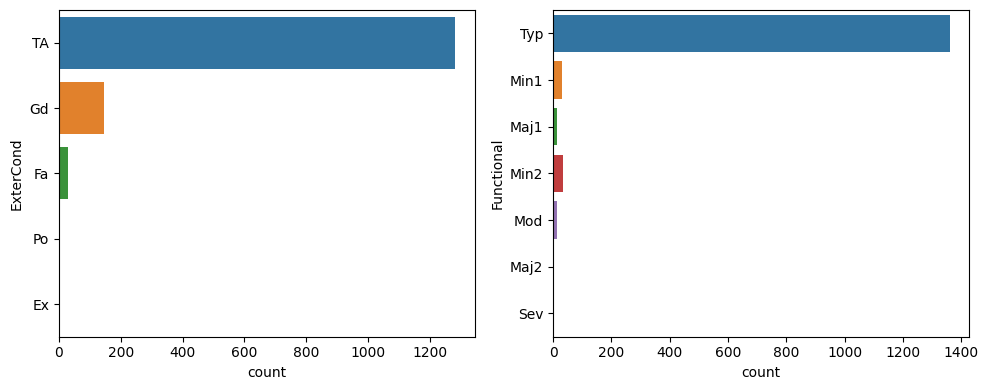

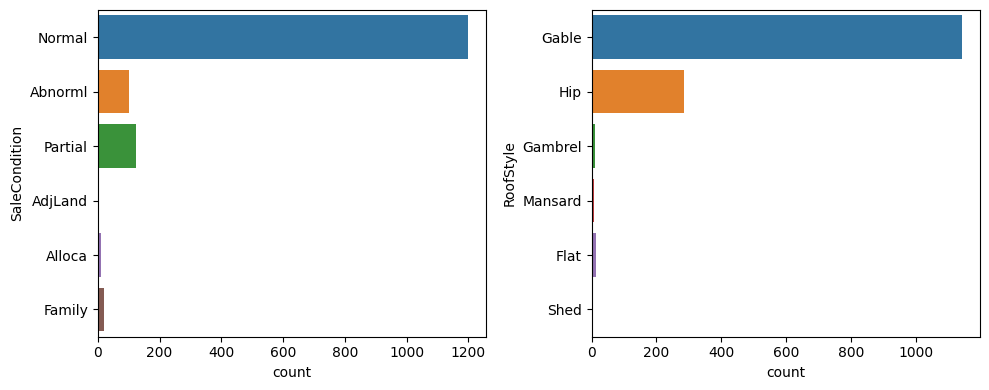

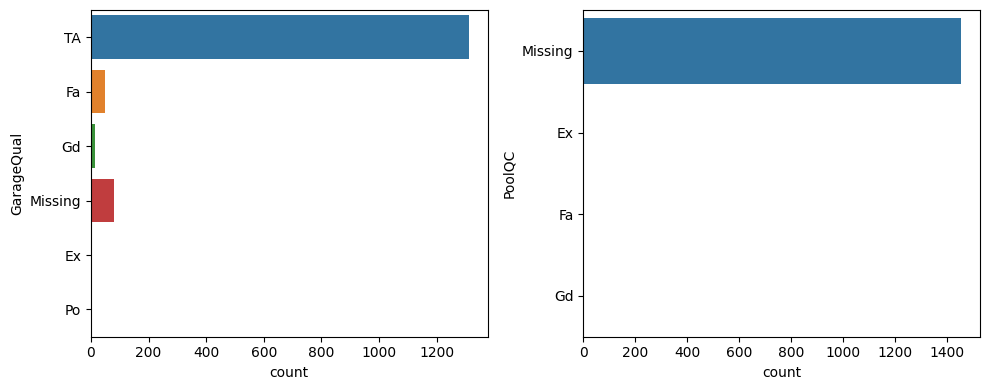

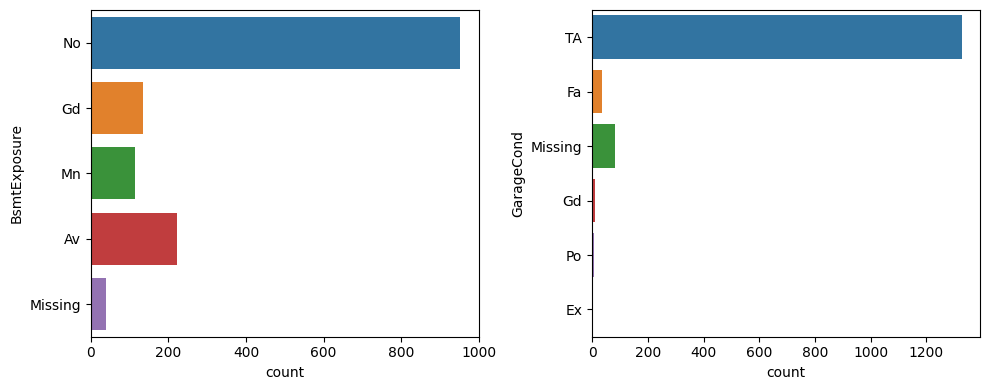

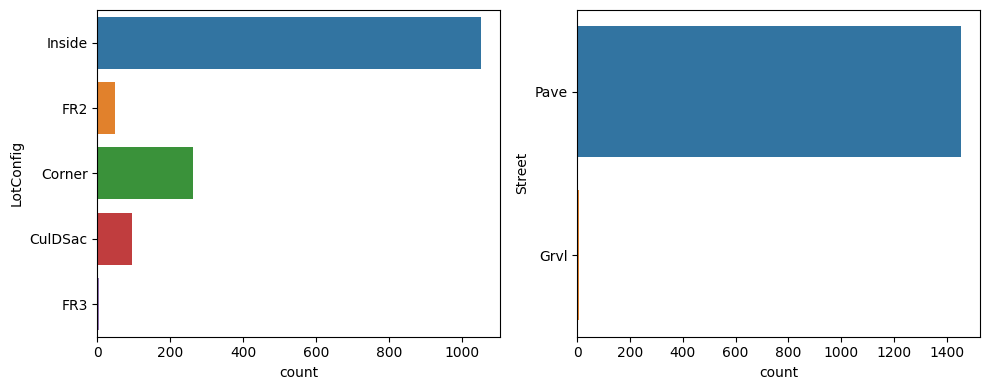

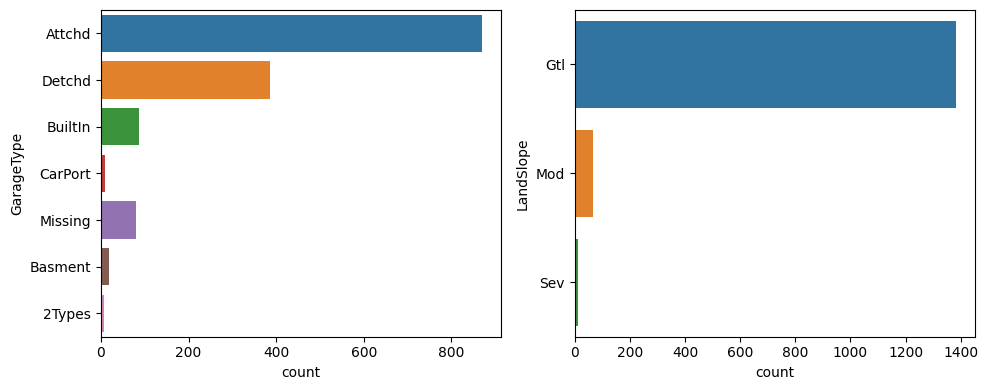

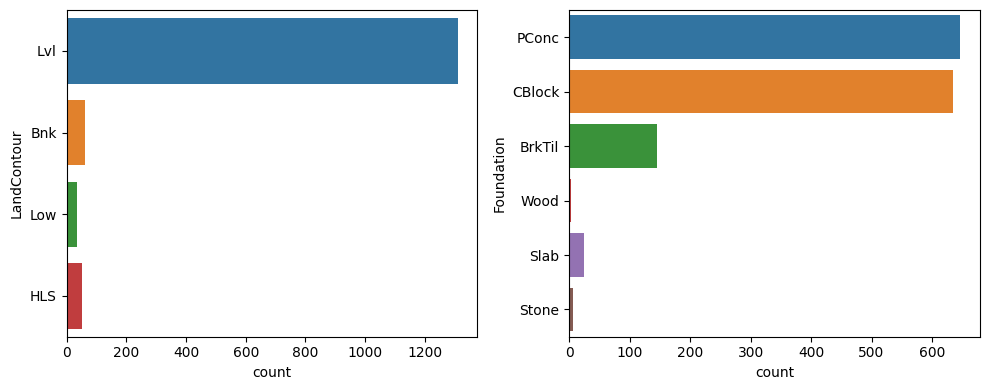

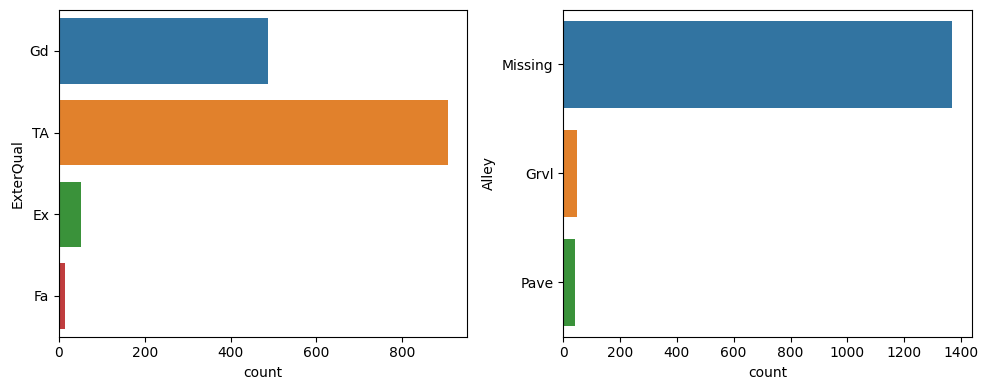

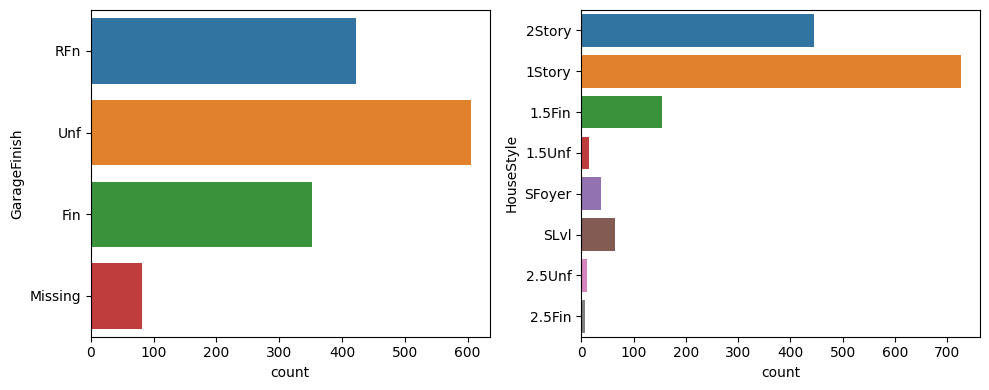

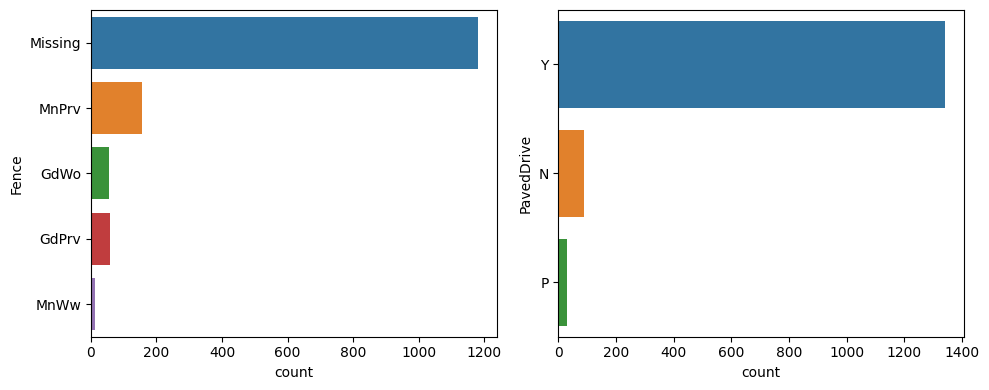

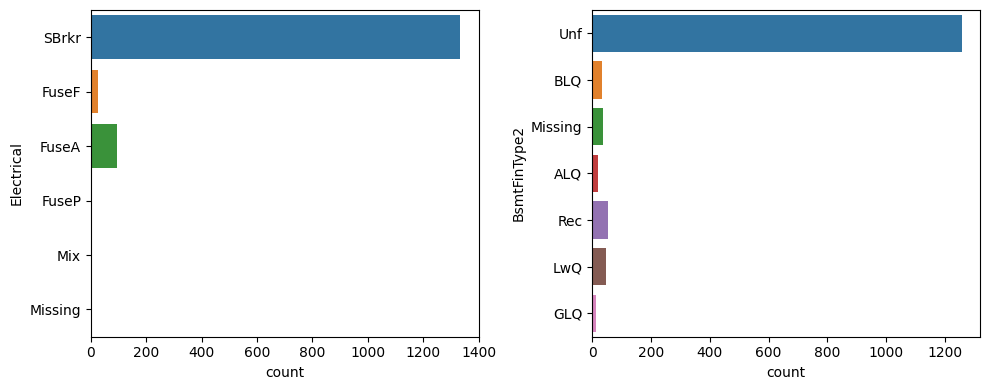

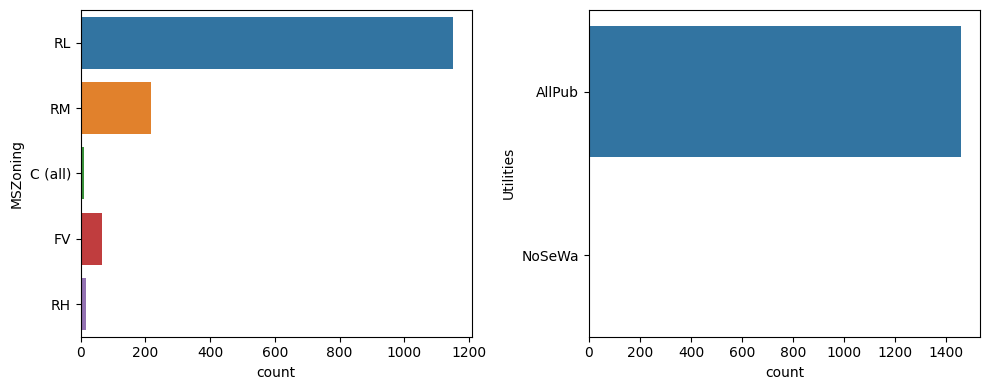

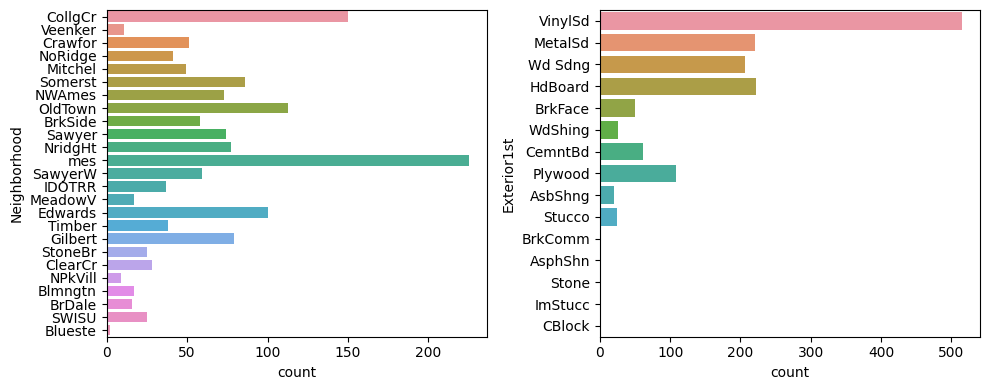

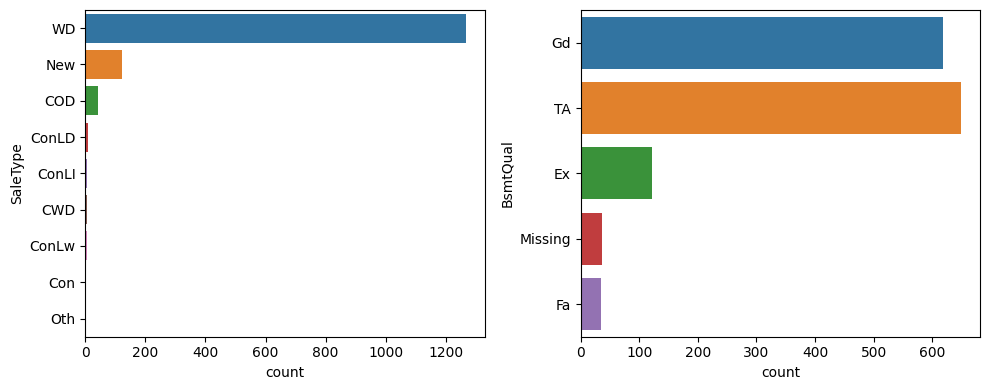

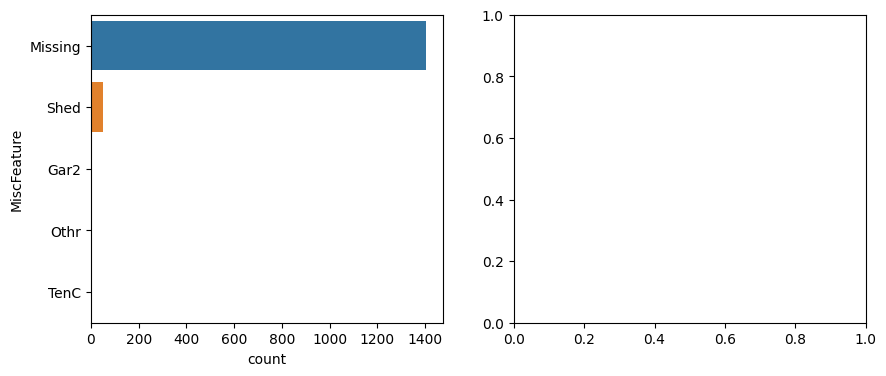

In [38]:
for i in range(0,len(categorical_feature_columns),2):
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.countplot(y = categorical_feature_columns[i] , data=dataframe)
        try: 
          plt.subplot(122)         
          sns.countplot(y = categorical_feature_columns[i+1] , data=dataframe)
        except:
          continue
        plt.tight_layout()
        plt.show()

* Identify significant variables using p-values and Chi-Square values

In [39]:
from scipy.stats import chi2_contingency

p_values = []
for cat_var in categorical_feature_columns:
    cross_tab = pd.crosstab(dataframe[cat_var], dataframe['SalePrice'])
    chi2, p, dof, expected = chi2_contingency(cross_tab)
    p_values.append(p)

In [40]:
sig_vars = [categorical_feature_columns[i] for i in range(len(p_values)) if p_values[i] < 0.05]
sig_vars

['BsmtCond',
 'CentralAir',
 'LotShape',
 'KitchenQual',
 'FireplaceQu',
 'MasVnrType',
 'Heating',
 'ExterCond',
 'SaleCondition',
 'BsmtExposure',
 'LotConfig',
 'Street',
 'Foundation',
 'ExterQual',
 'GarageFinish',
 'MSZoning',
 'Neighborhood',
 'SaleType',
 'BsmtQual']

* Convert significant categorical variables to numerical using one-hot encoding

In [41]:
cat_data = pd.get_dummies(dataframe[sig_vars])
cat_data

BsmtCond_Fa  BsmtCond_Gd  BsmtCond_Missing  BsmtCond_Po  BsmtCond_TA  \
0               0            0                 0            0            1   
1               0            0                 0            0            1   
2               0            0                 0            0            1   
3               0            1                 0            0            0   
4               0            0                 0            0            1   
...           ...          ...               ...          ...          ...   
1455            0            0                 0            0            1   
1456            0            0                 0            0            1   
1457            0            1                 0            0            0   
1458            0            0                 0            0            1   
1459            0            0                 0            0            1   

      CentralAir_N  CentralAir_Y  LotShape_IR1  LotShape_IR2  LotShape_IR3  \
0                0             1             0             0             0   
1                0             1             0             0             0   
2                0             1             1             0             0   
3                0             1             1             0             0   
4                0             1             1             0             0   
...            ...           ...           ...           ...           ...   
1455             0             1             0             0             0   
1456             0             1             0             0             0   
1457             0             1             0             0             0   
1458             0             1             0             0             0   
1459             0             1             0             0             0   

      ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0     ...               0               0             0             0   
1     ...               0               0             0             0   
2     ...               0               0             0             0   
3     ...               0               0             0             0   
4     ...               0               0             0             0   
...   ...             ...             ...           ...           ...   
1455  ...               0               0             0             0   
1456  ...               0               0             0             0   
1457  ...               0               0             0             0   
1458  ...               0               0             0             0   
1459  ...               0               0             0             0   

      SaleType_WD  BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_Missing  \
0               1            0            0            1                 0   
1               1            0            0            1                 0   
2               1            0            0            1                 0   
3               1            0            0            0                 0   
4               1            0            0            1                 0   
...           ...          ...          ...          ...               ...   
1455            1            0            0            1                 0   
1456            1            0            0            1                 0   
1457            1            0            0            0                 0   
1458            1            0            0            0                 0   
1459            1            0            0            0                 0   

      BsmtQual_TA  
0               0  
1               0  
2               0  
3               1  
4               0  
...           ...  
1455            0  
1456            0  
1457            1  
1458            1  
1459            1  

[1460 rows x 113 columns]

# 5.Combine all the significant categorical and numerical variables

In [42]:
k = 10 
sig_num_cols = dataframe.corr().nlargest(k, 'SalePrice')['SalePrice'].index
combined_data = pd.concat([dataframe[sig_num_cols], cat_data], axis=1)

In [43]:
combined_data

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0        208500            7       1710           2         548          856   
1        181500            6       1262           2         460         1262   
2        223500            7       1786           2         608          920   
3        140000            7       1717           3         642          756   
4        250000            8       2198           3         836         1145   
...         ...          ...        ...         ...         ...          ...   
1455     175000            6       1647           2         460          953   
1456     210000            6       2073           2         500         1542   
1457     266500            7       2340           1         252         1152   
1458     142125            5       1078           1         240         1078   
1459     147500            5       1256           1         276         1256   

      1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  ...  SaleType_ConLI  \
0          856         2             8       2003  ...               0   
1         1262         2             6       1976  ...               0   
2          920         2             6       2001  ...               0   
3          961         1             7       1915  ...               0   
4         1145         2             9       2000  ...               0   
...        ...       ...           ...        ...  ...             ...   
1455       953         2             7       1999  ...               0   
1456      2073         2             7       1978  ...               0   
1457      1188         2             9       1941  ...               0   
1458      1078         1             5       1950  ...               0   
1459      1256         1             6       1965  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  BsmtQual_Ex  \
0                  0             0             0            1            0   
1                  0             0             0            1            0   
2                  0             0             0            1            0   
3                  0             0             0            1            0   
4                  0             0             0            1            0   
...              ...           ...           ...          ...          ...   
1455               0             0             0            1            0   
1456               0             0             0            1            0   
1457               0             0             0            1            0   
1458               0             0             0            1            0   
1459               0             0             0            1            0   

      BsmtQual_Fa  BsmtQual_Gd  BsmtQual_Missing  BsmtQual_TA  
0               0            1                 0            0  
1               0            1                 0            0  
2               0            1                 0            0  
3               0            0                 0            1  
4               0            1                 0            0  
...           ...          ...               ...          ...  
1455            0            1                 0            0  
1456            0            1                 0            0  
1457            0            0                 0            1  
1458            0            0                 0            1  
1459            0            0                 0            1  

[1460 rows x 123 columns]

* Plot Boxplot of new dataset to find variables with the  outliers

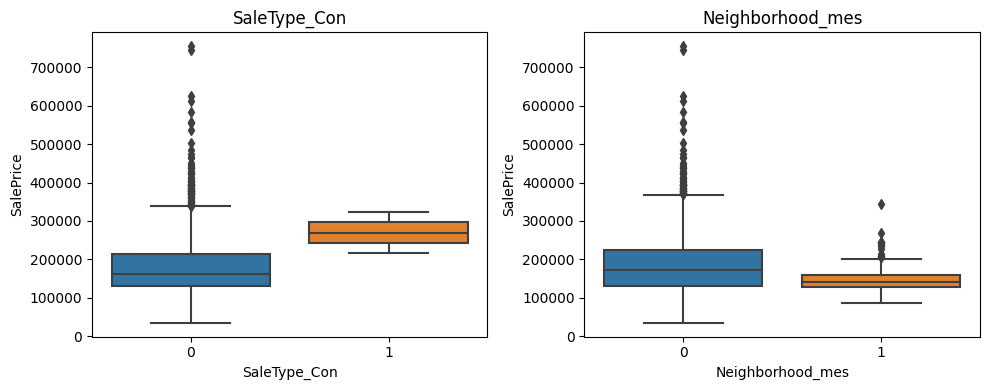

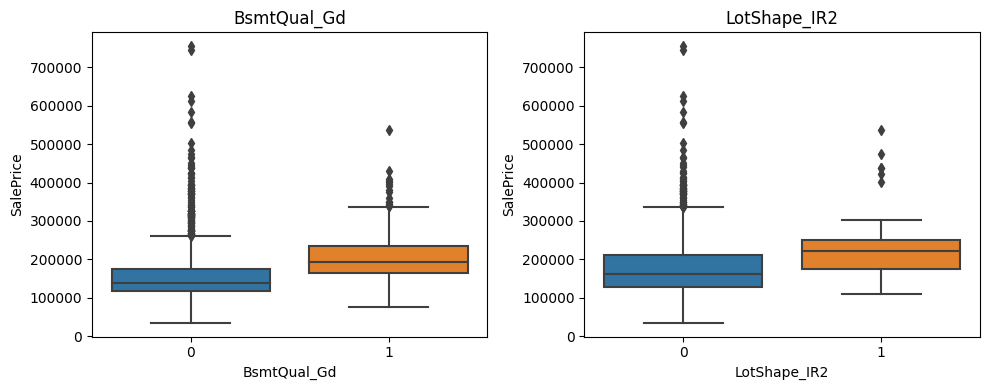

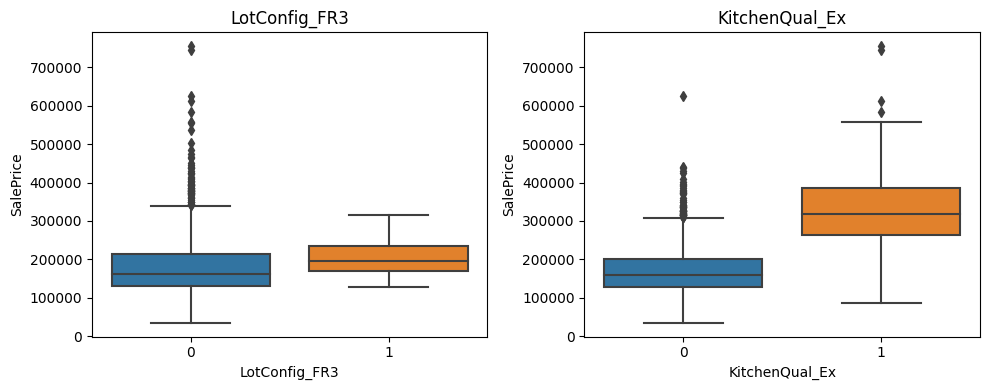

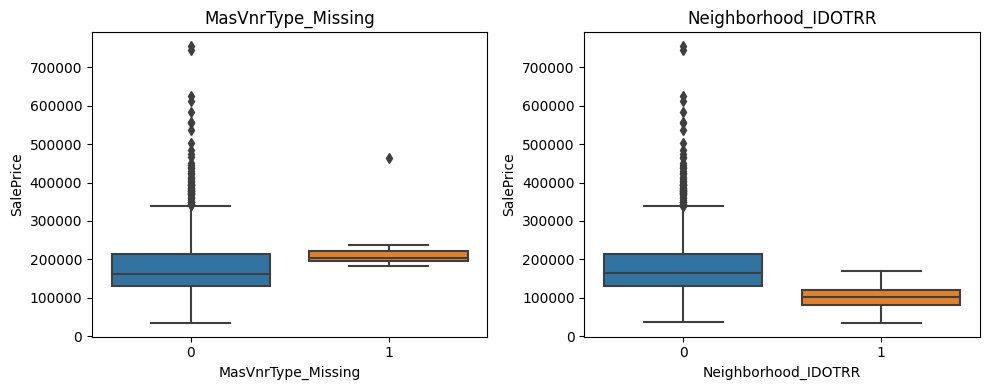

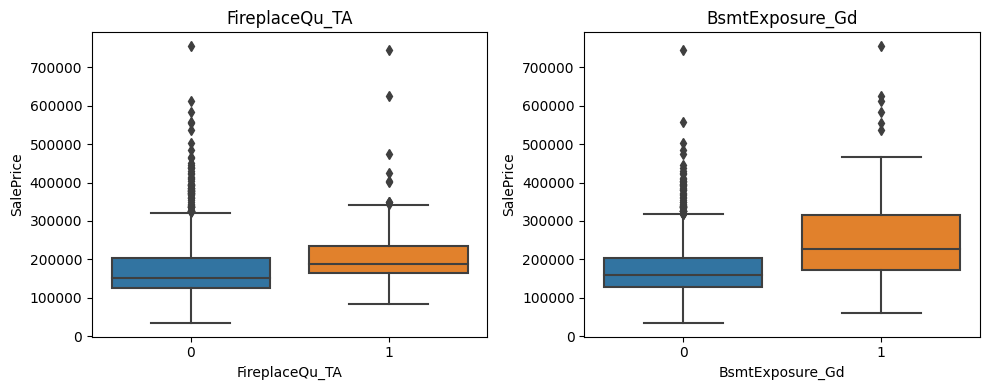

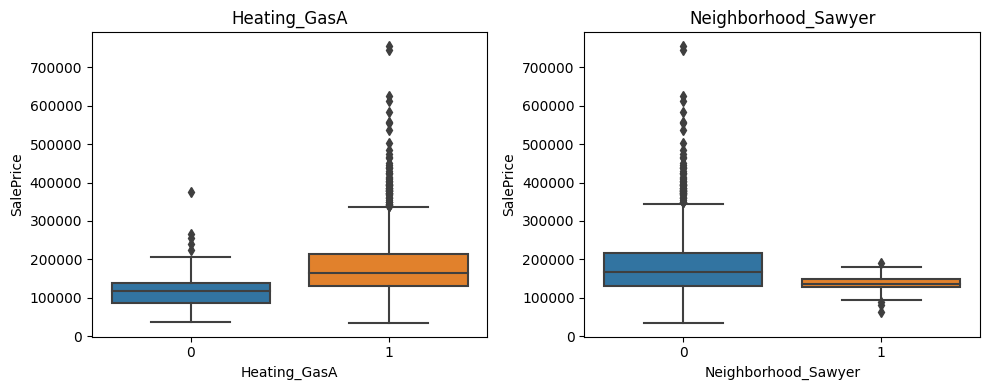

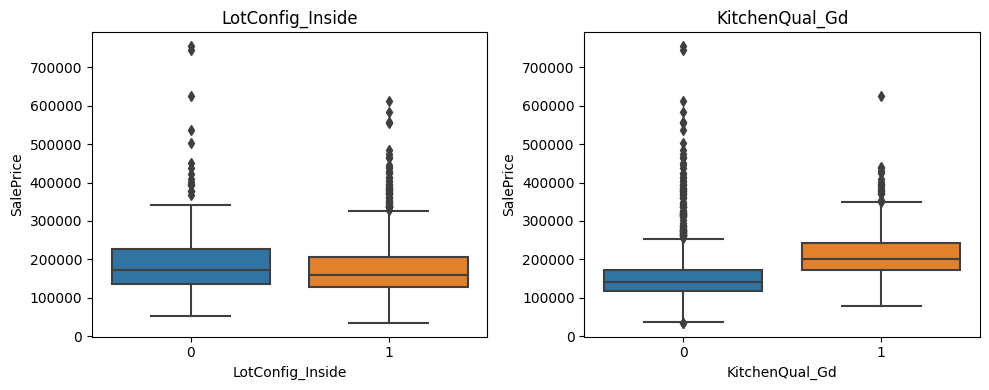

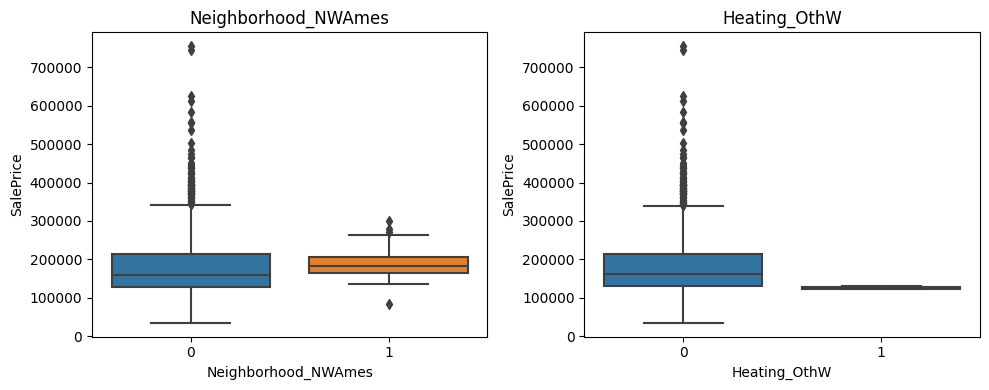

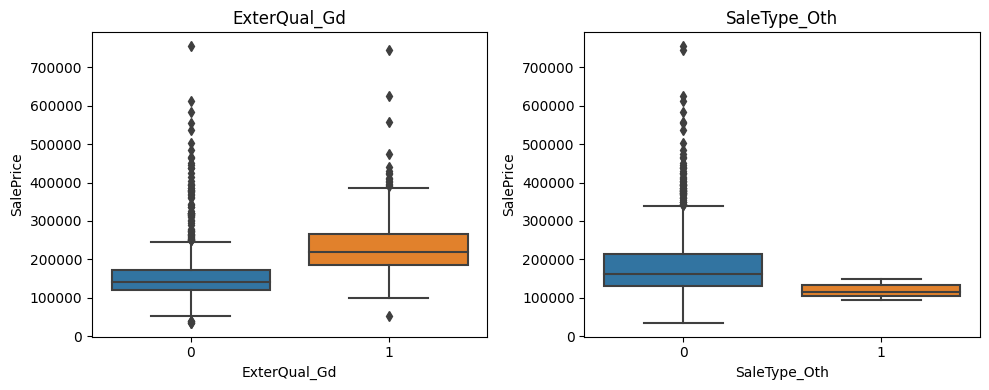

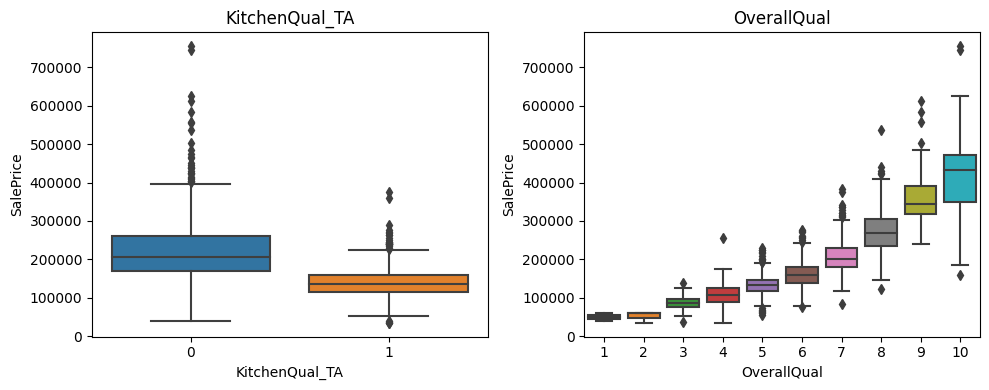

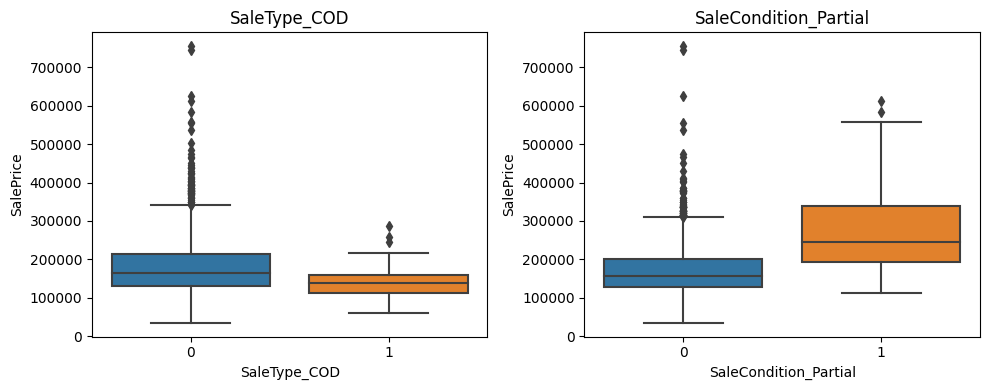

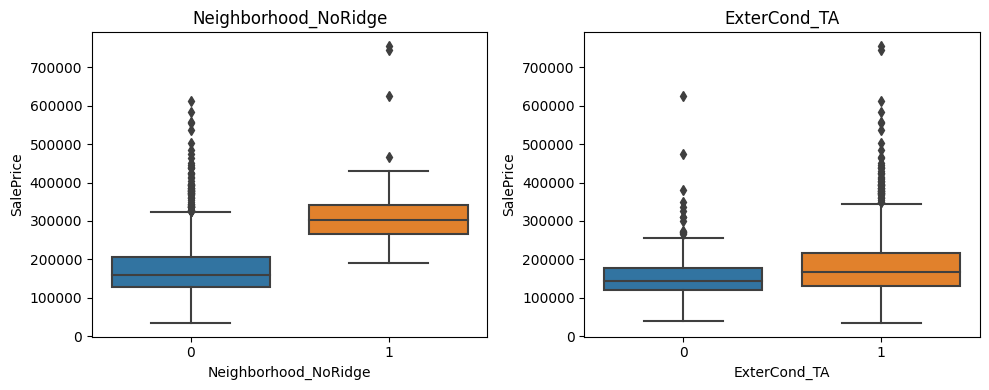

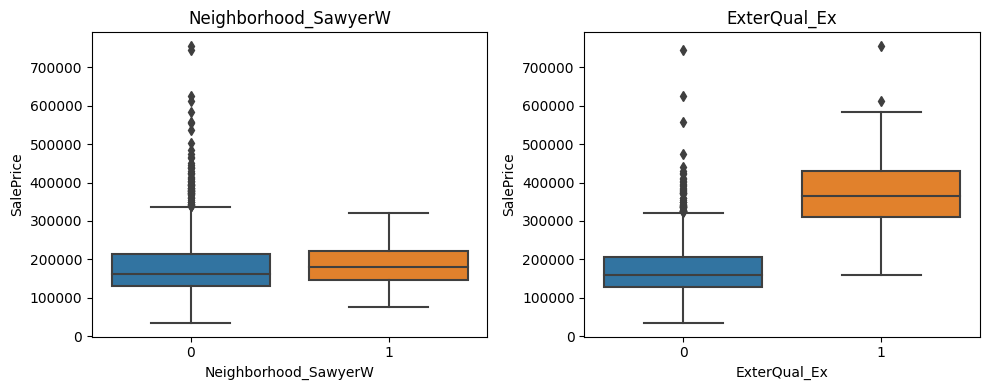

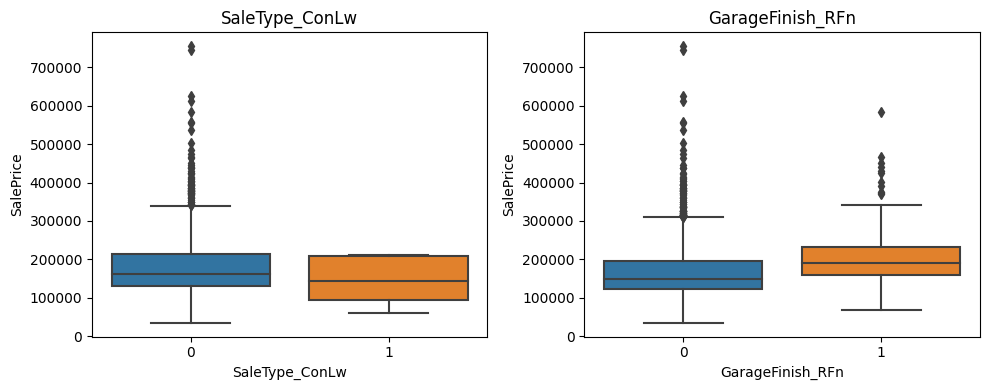

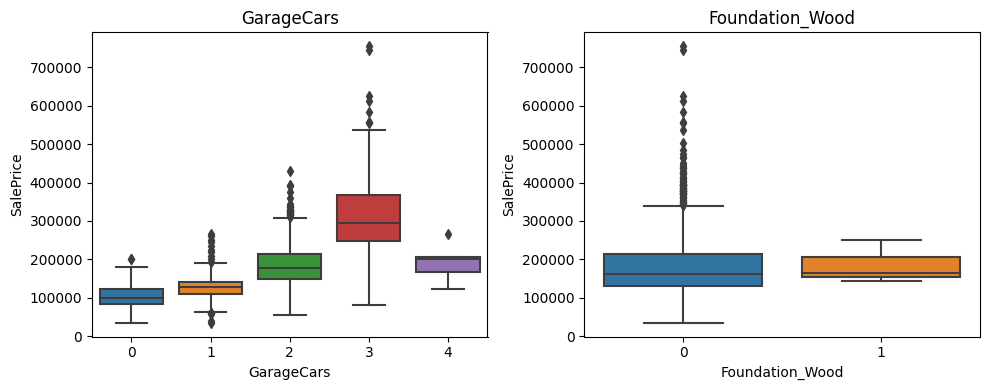

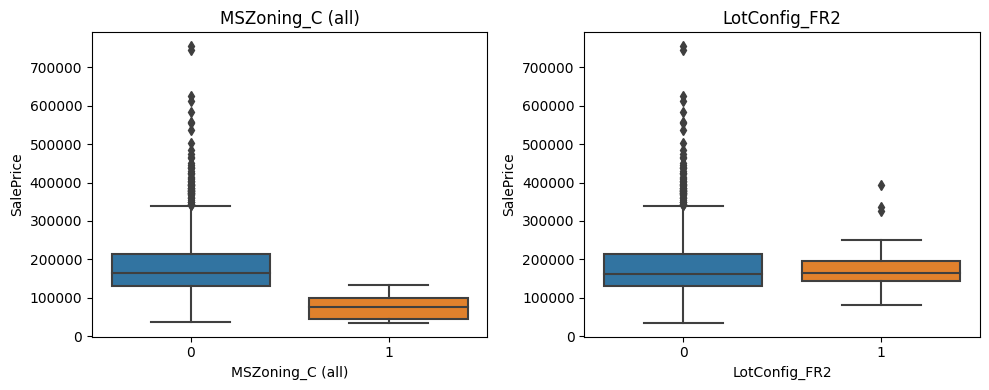

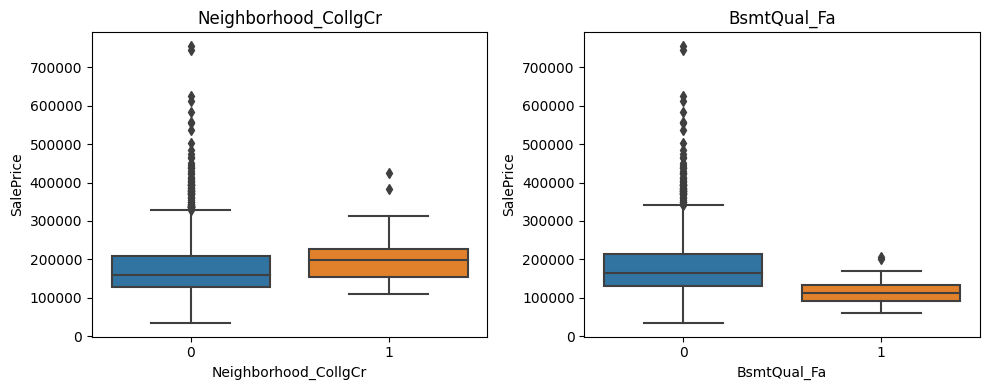

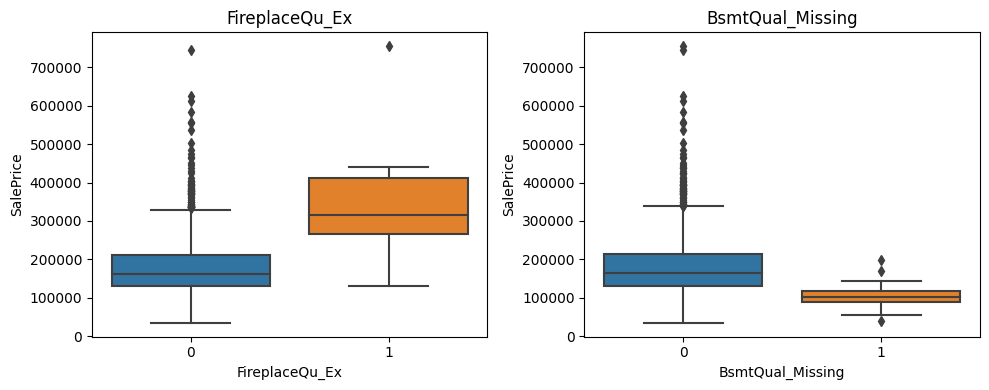

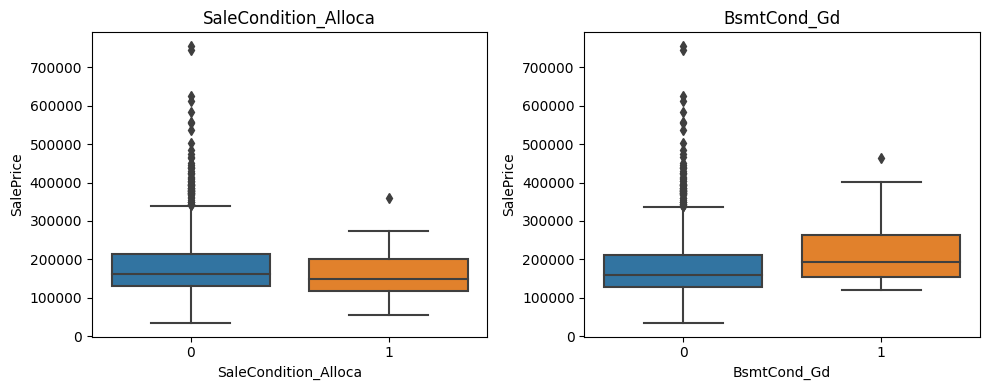

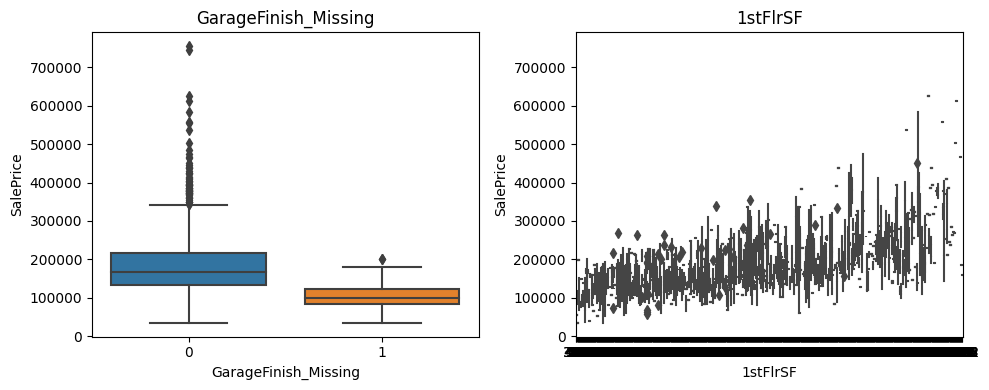

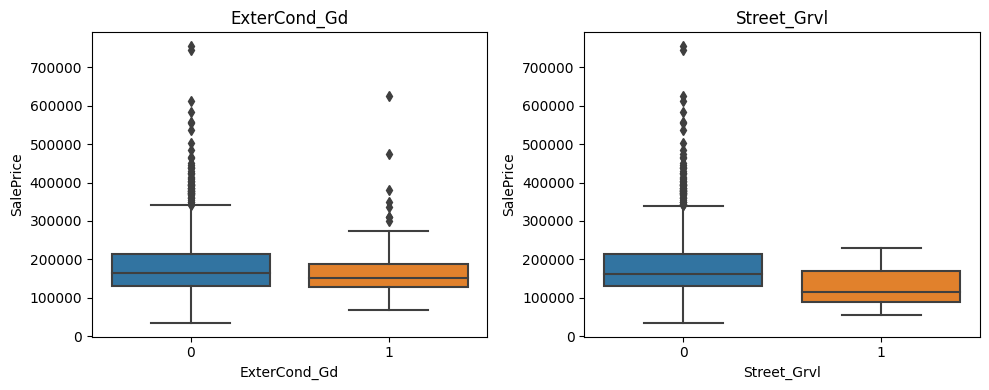

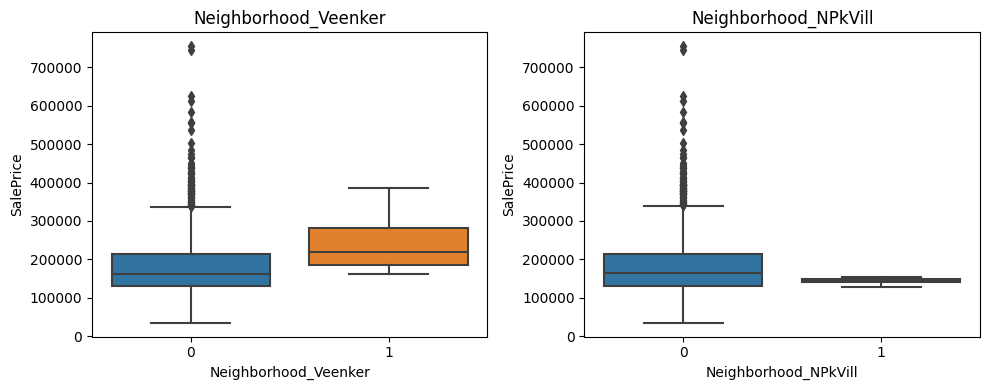

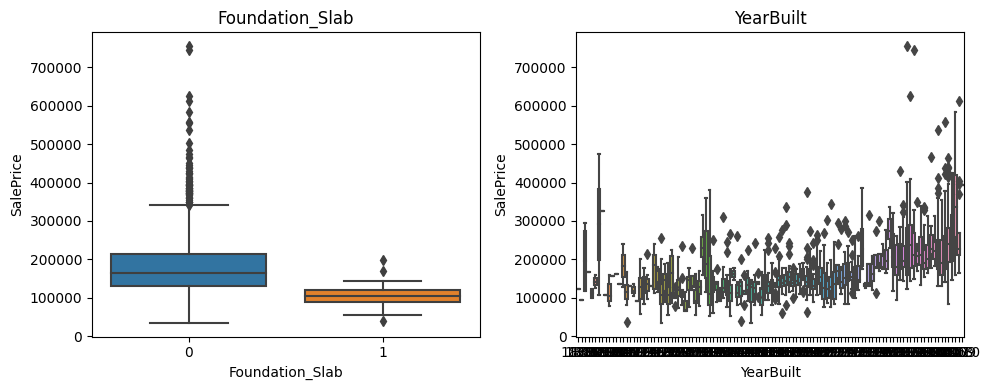

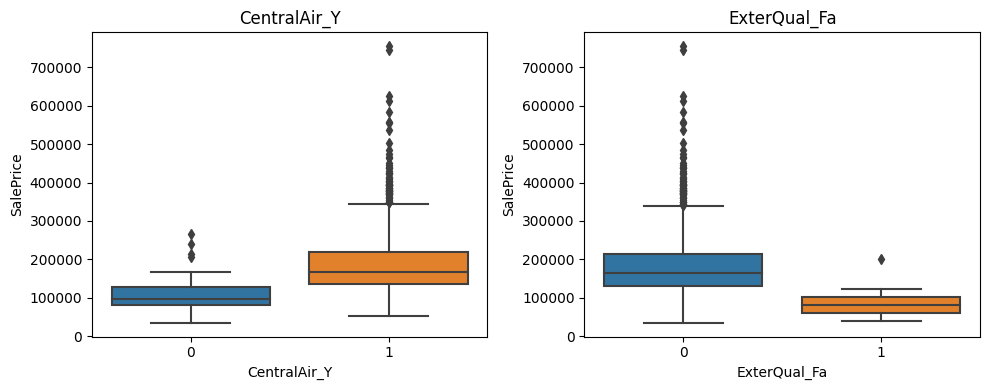

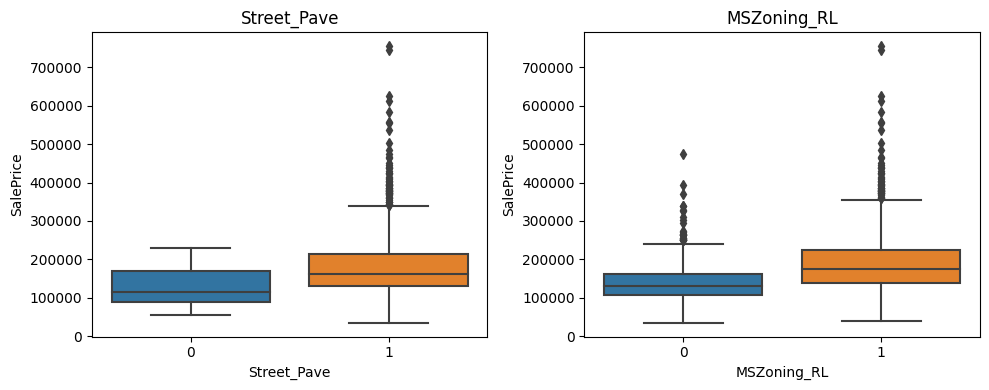

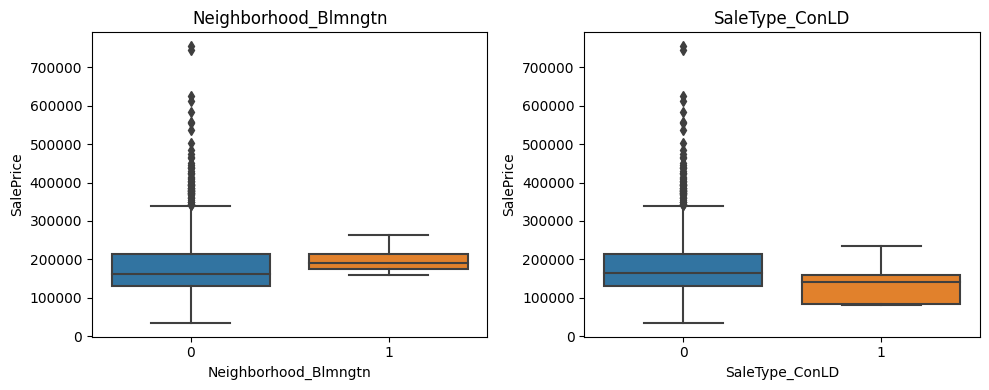

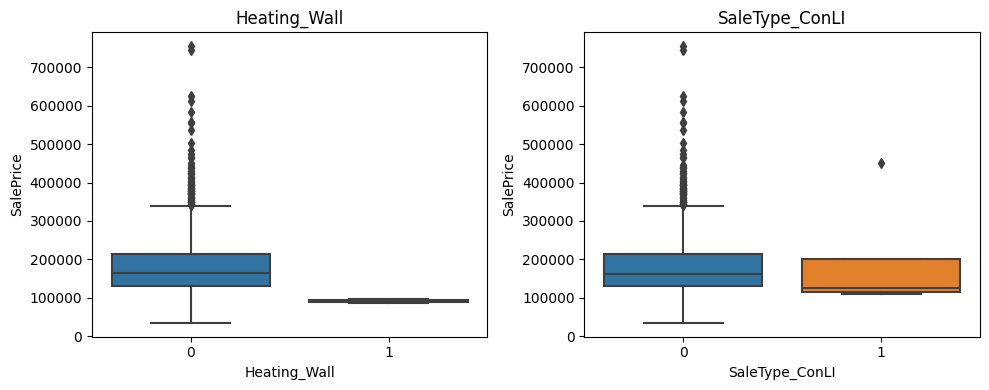

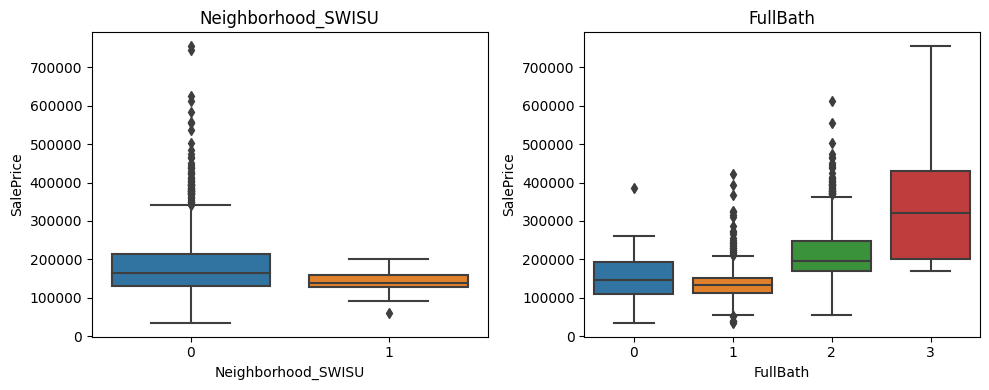

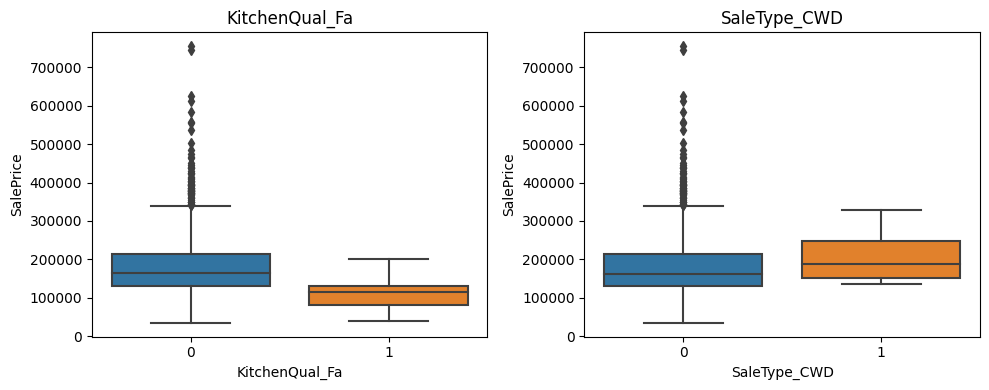

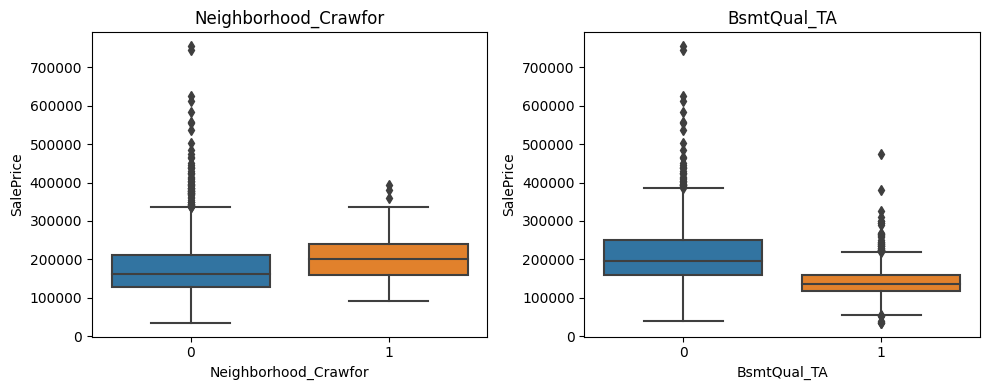

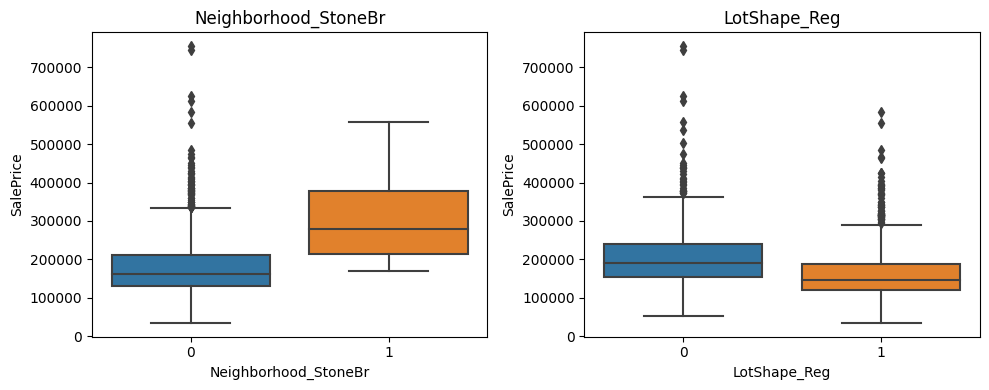

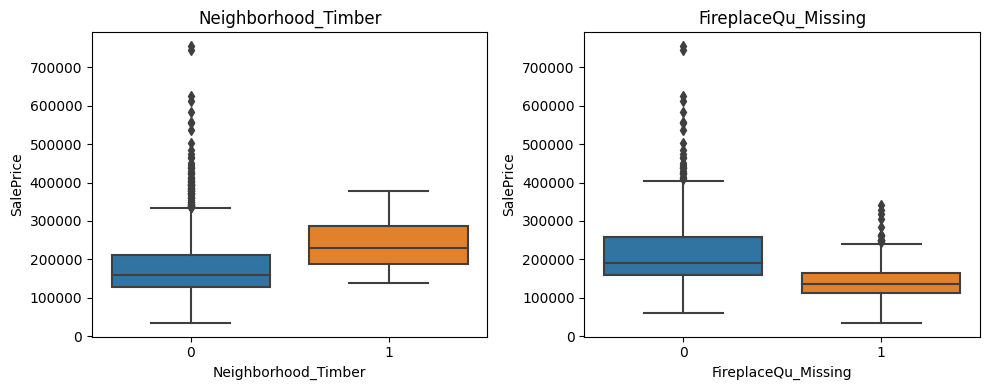

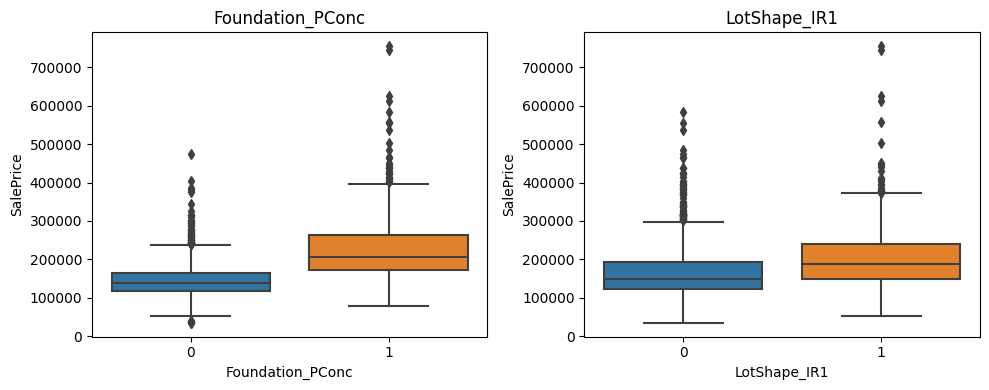

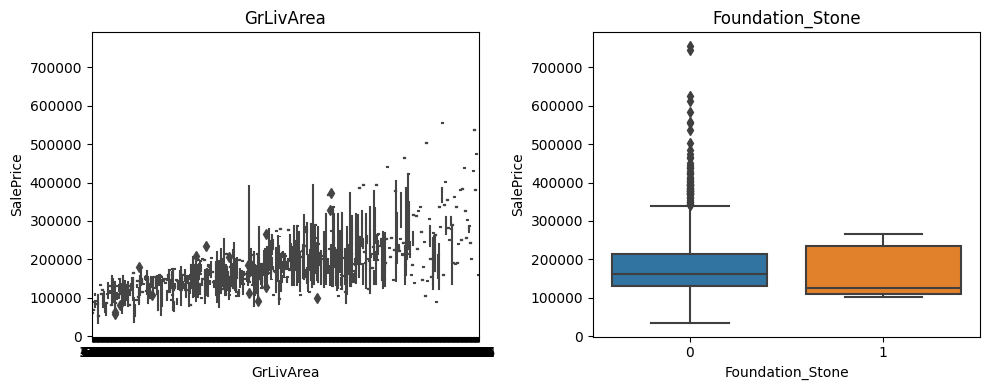

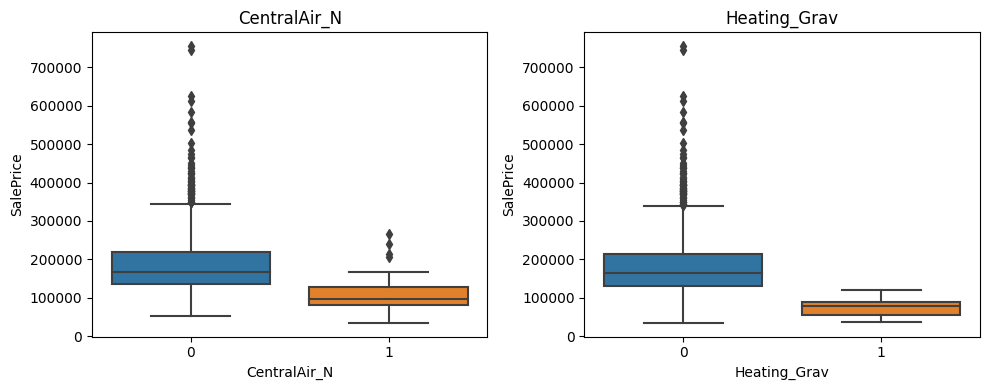

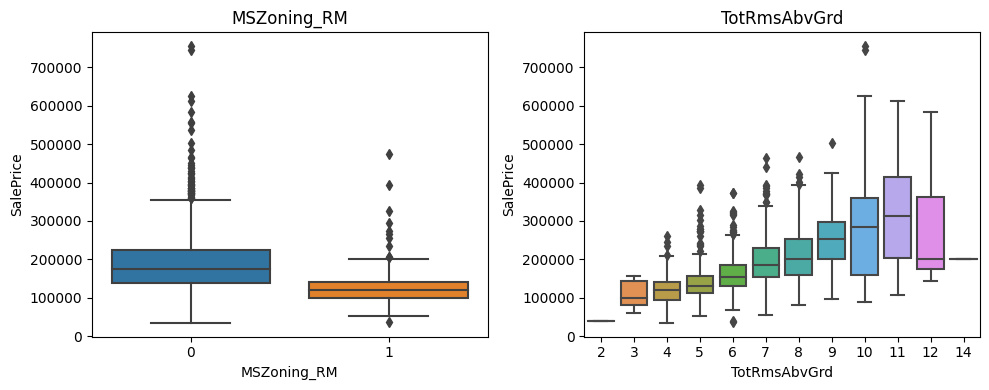

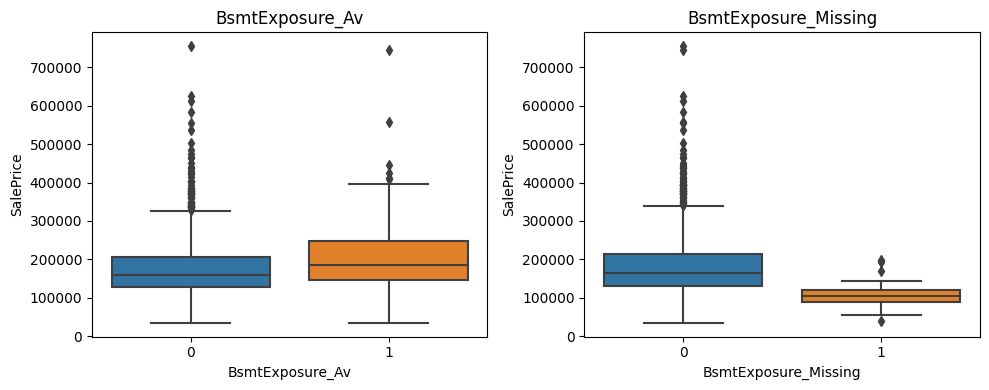

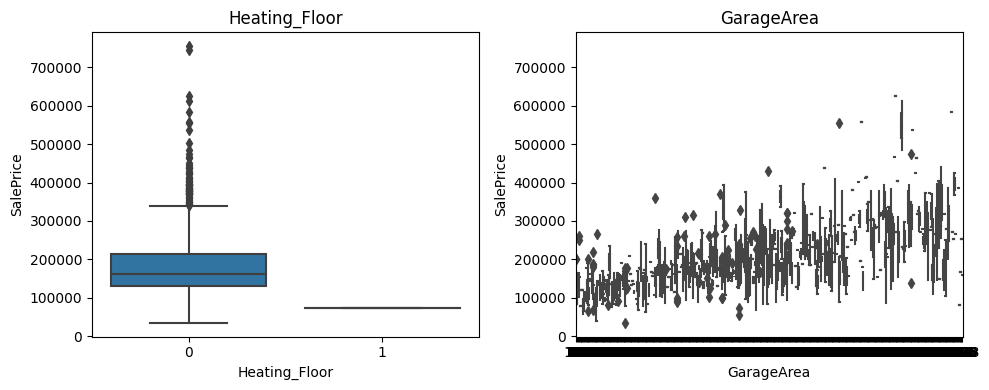

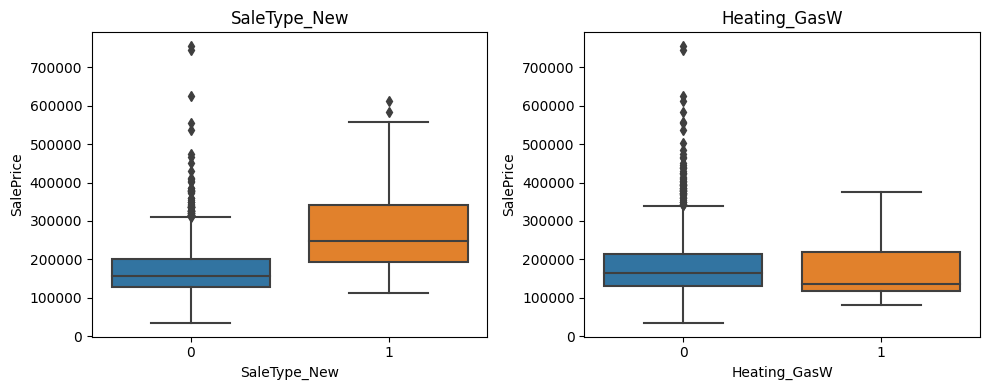

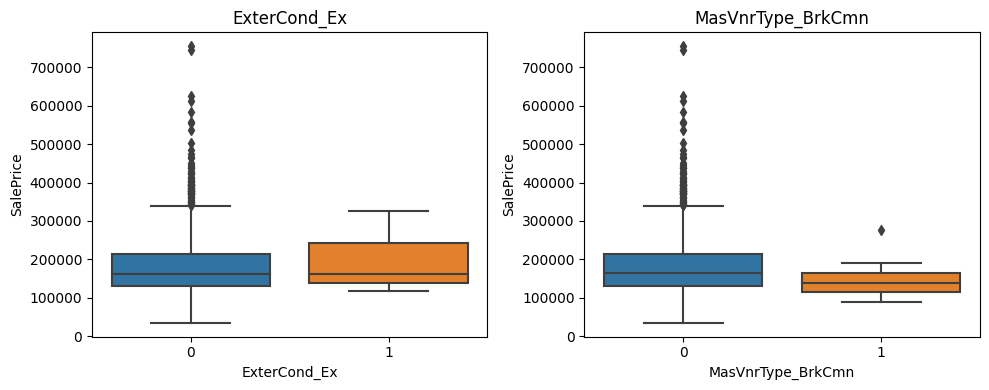

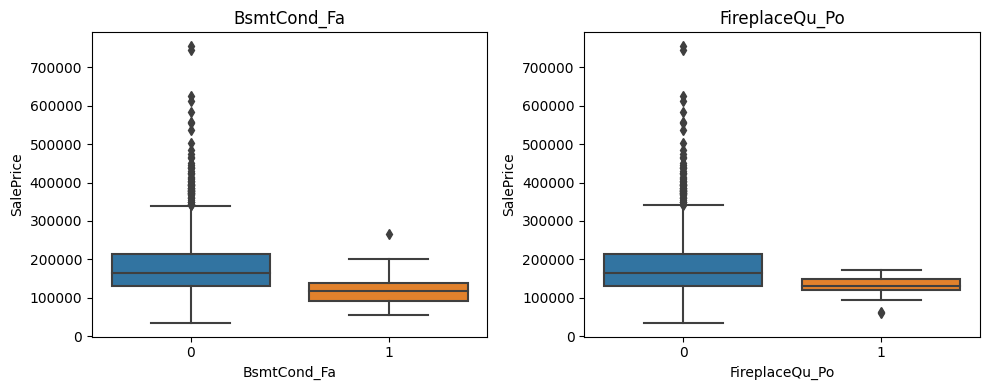

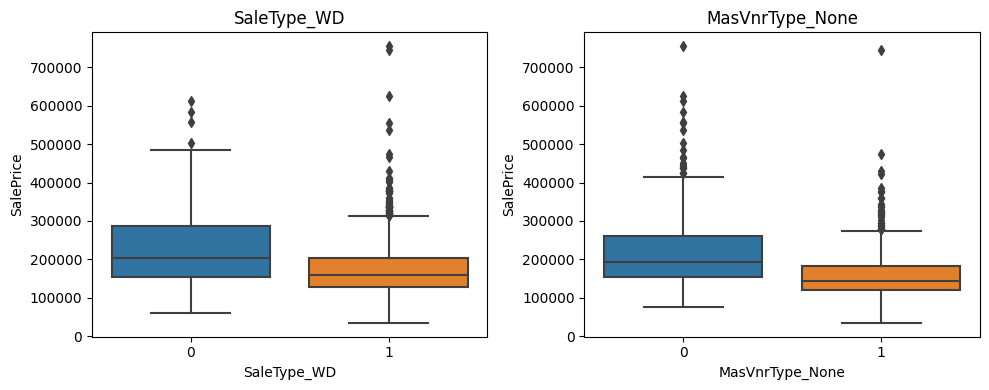

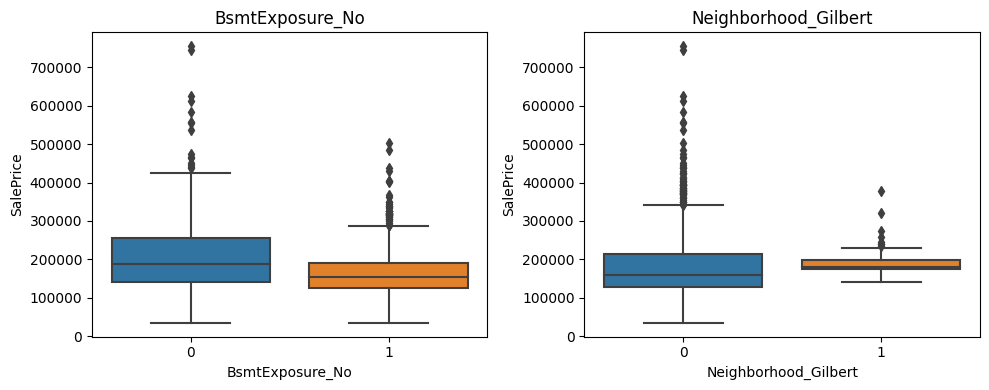

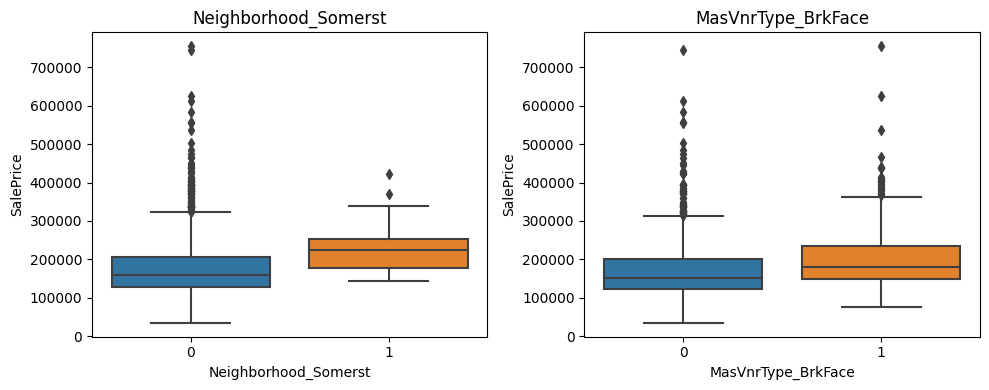

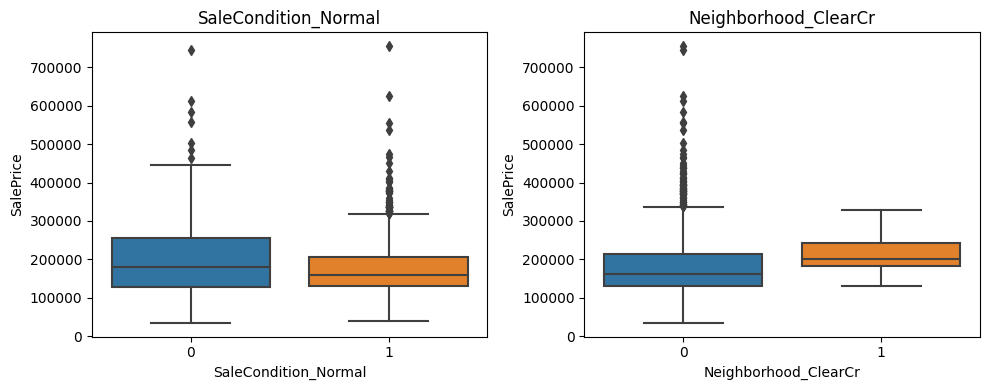

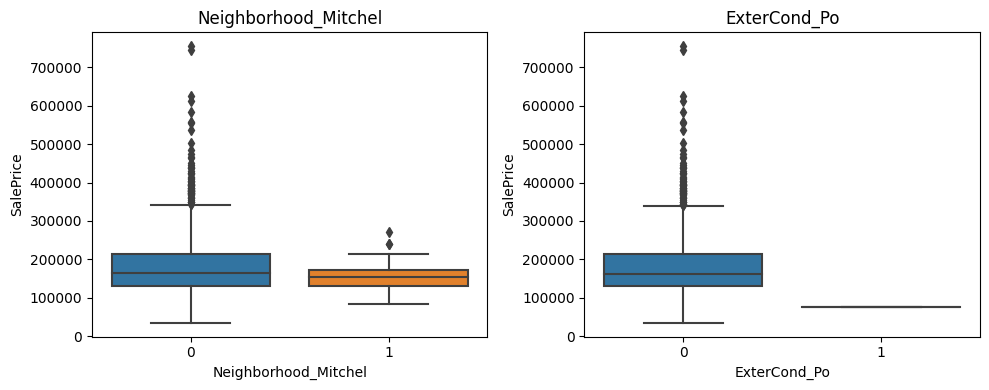

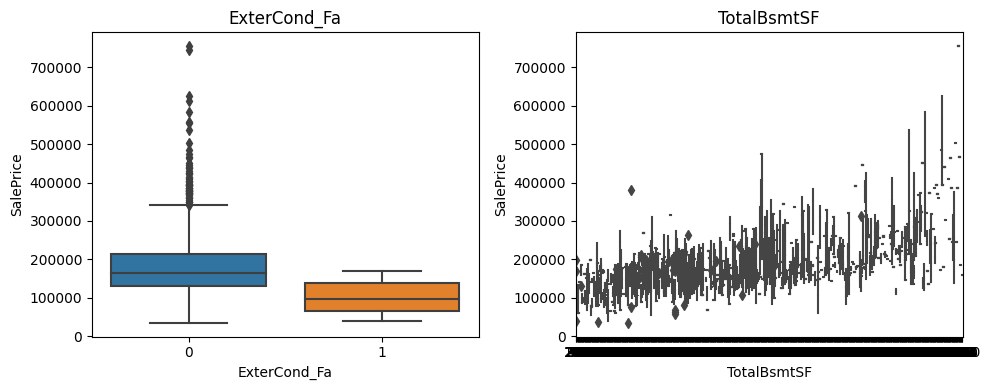

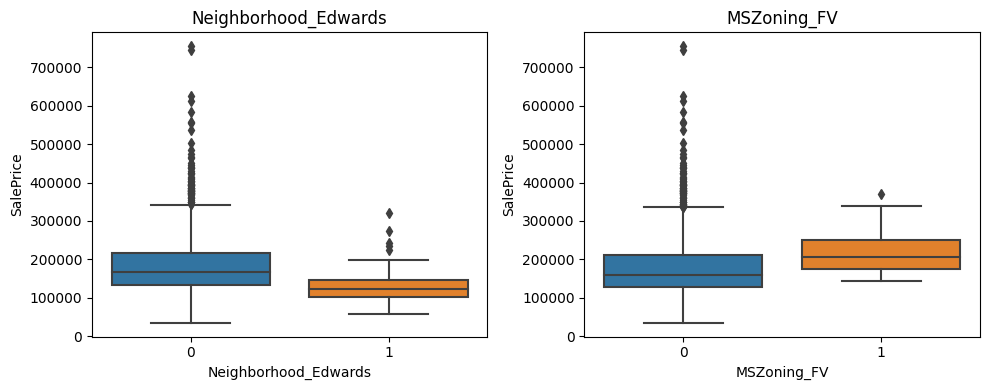

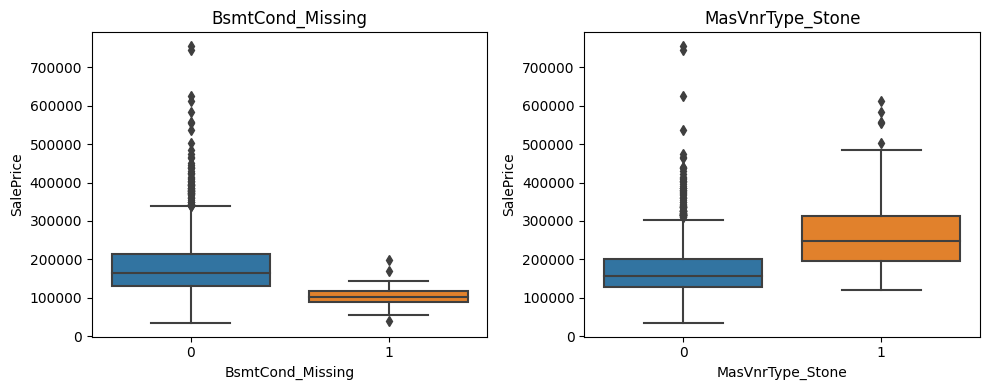

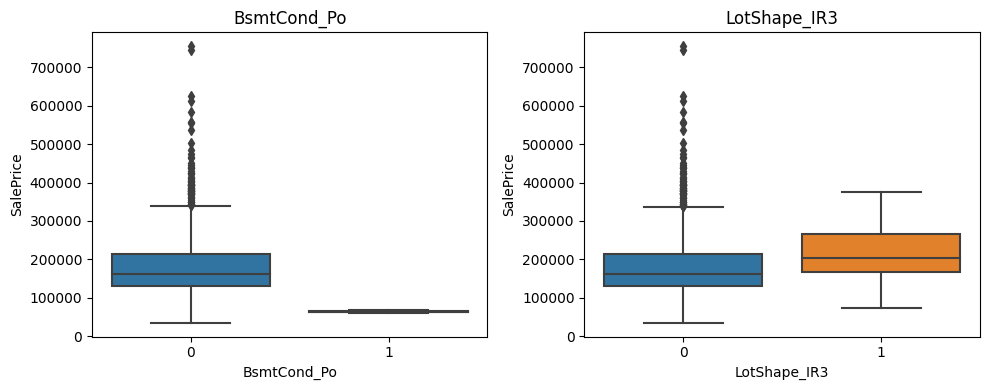

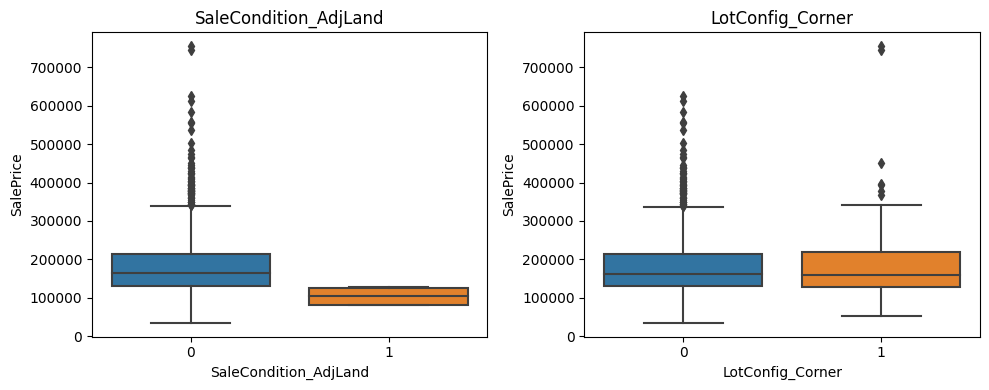

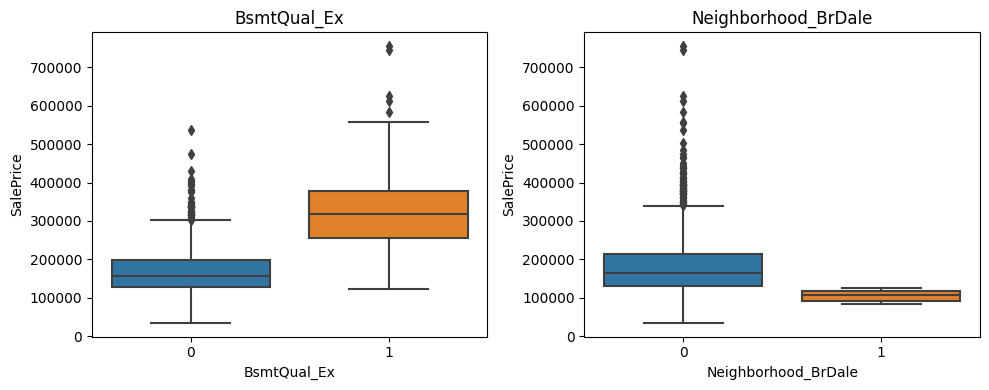

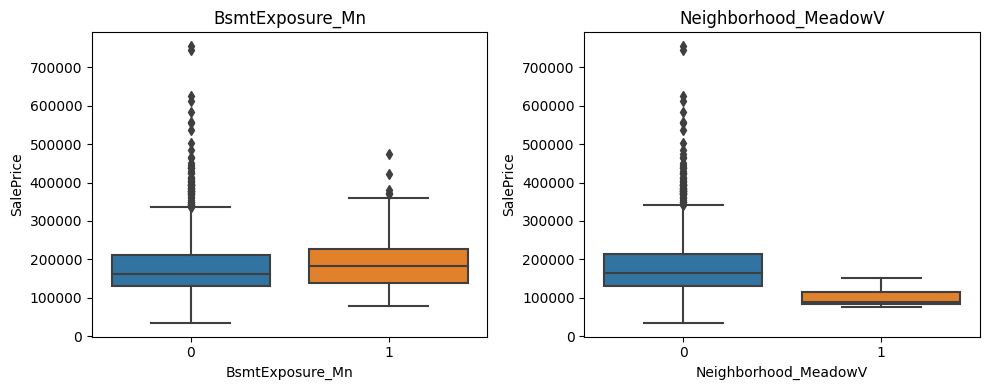

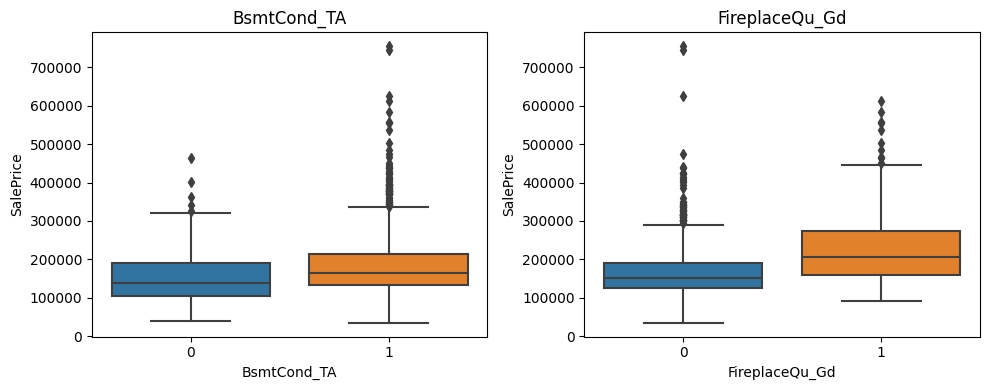

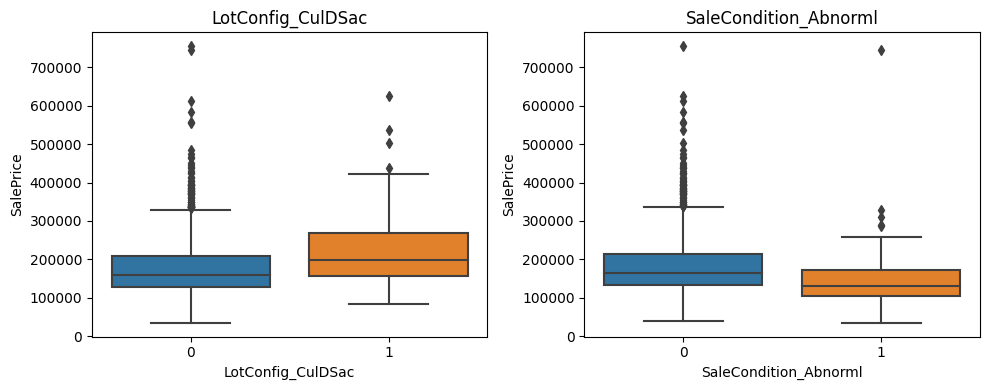

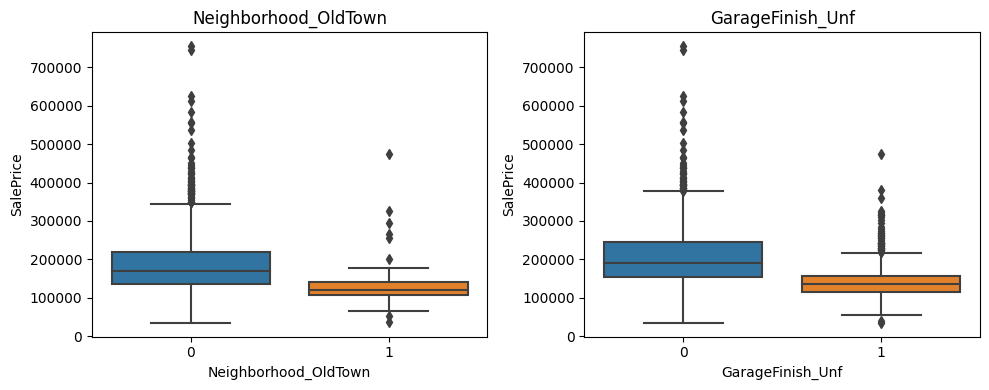

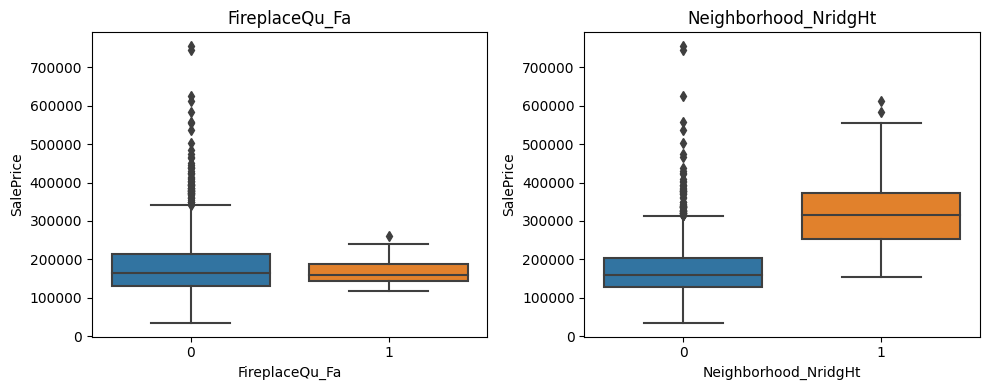

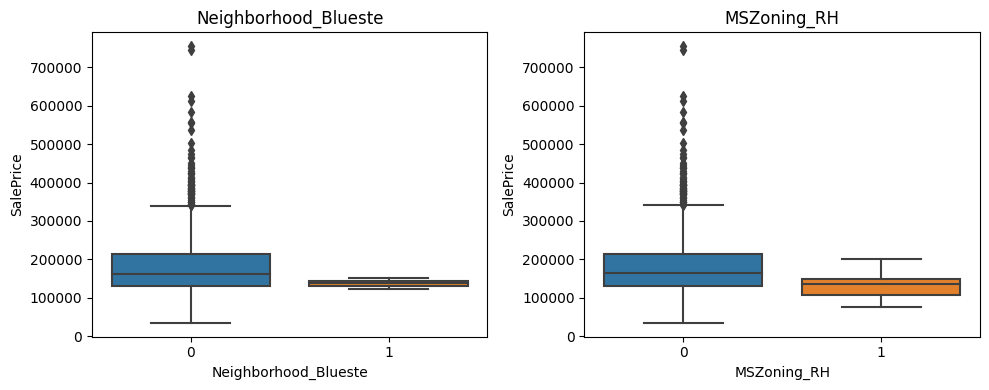

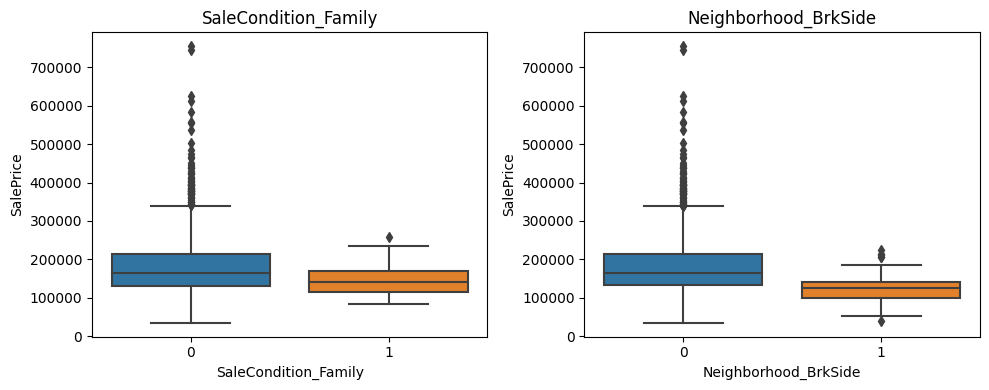

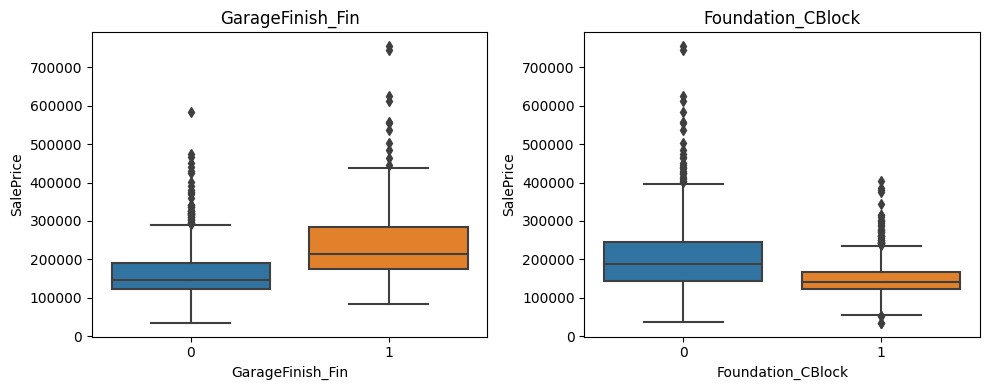

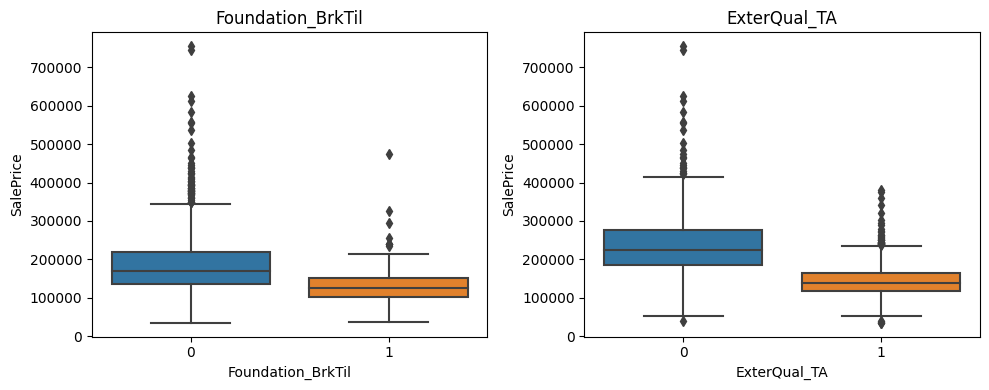

In [44]:
import seaborn as sns
com_col = list(set(combined_data.columns))
com_col.remove('SalePrice')
for i in range(0,len(com_col),2):
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.boxplot(x=com_col[i],y='SalePrice', data=combined_data )
    plt.title(com_col[i])
    try: 
          plt.subplot(122)
          sns.boxplot(x=com_col[i+1],y='SalePrice', data=combined_data )
          plt.title(com_col[i+1])
    except:
          continue
    plt.tight_layout()
    plt.show()